### Links

* https://wiseodd.github.io/techblog/2016/06/22/nn-optimization/ (Nasterov Momementum)
* https://wiseodd.github.io/techblog/2016/06/21/nn-sgd/ (Implementing Minibatch Gradient Descent)
* https://gitlab.com/erehm/PiecewiseG1BezierFit (MATLAB Fitting a Bezier curve)
* https://github.com/soswow/fit-curve/blob/1bc4dd6fd43e21052a0e706d5de57e801bc35085/python/fitCurves.py (Python implementation of fitCurve)
* 

In [3]:
import _MEWtools as mt
import multiprocessing

## Get baseline time for CPU Intensive Workload

In [4]:
iterations = 5

def slow_worker():
    for i in range(8000):
        square = i**i

    print('Done')

In [5]:
import time

# t0 = time.time()

# for i in range(iterations):
#     slow_worker()

# t1 = time.time()

# total = t1-t0
# display(f'Total Execution Time: {total} seconds')

## Perform same operation with multiprocessing

In [6]:
t0 = time.time()

pool = multiprocessing.Pool(iterations)
for i in range(iterations):
    pool.apply_async(slow_worker)
    
pool.close()
pool.join()

t1 = time.time()

total = t1-t0
display(f'Total Execution Time: {total} seconds')

Done
Done
Done
Done
Done


'Total Execution Time: 2.4952800273895264 seconds'

## Load an interior structure from a config file and populate a MEWTools Satellite

In [7]:
import utils

overrides = {
    'obliquity': 0,
    'obliquityPhase': 0,
    'obliquityPhaseRate': 0,
    'spinRate': 0,
    'nonSynchronusRotationRate': 0,
    'librationAmplitude': 0,
    'librationPhase': 0,
    'librationFrequency': 0
}

sample_sat = utils.import_structure('Sample', overrides)

In [8]:
structures = utils.list_structures()
structures

Sample


['Sample']

In [9]:
import sympy as sym
import numpy as np

r, θ, φ, t = sym.symbols('r θ φ t', real = True)
sample_sat.tt.subs(t,0).subs(φ,np.pi/4).subs(θ,np.pi/4).expand()
sample_sat.tt.expand()

-13369.3872888062*sin(θ)**2*cos(2.04661263817508e-5*t - 2*φ) - 14.6928130577004*I*sin(θ)**2*cos(2.04661263817508e-5*t - 2*φ) + 93585.7110216432*sin(θ)**2*cos(2.04661263817508e-5*t - 2*φ) + 102.849691403903*I*sin(θ)**2*cos(2.04661263817508e-5*t - 2*φ) - 13690.1623044156*cos(2.04661263817508e-5*t)*cos(2*θ) - 117.875147128307*I*cos(2.04661263817508e-5*t)*cos(2*θ) - 22175.3871428071*cos(2.04661263817508e-5*t) + 9.90608959403469*I*cos(2.04661263817508e-5*t) - 8805.99985400096*cos(θ)**2*cos(2.04661263817508e-5*t - 2*φ) + 24.5989026517351*I*cos(θ)**2*cos(2.04661263817508e-5*t - 2*φ) + 61641.9989780067*cos(θ)**2*cos(2.04661263817508e-5*t - 2*φ) - 172.192318562146*I*cos(θ)**2*cos(2.04661263817508e-5*t - 2*φ)

## Performance comparison of different evaluation methods

In [10]:
import math

fm = sym.lambdify([t, φ, θ], sample_sat.PC1, modules = ["math", {"cot": math.atan}])
fn = sym.lambdify([t, φ, θ], sample_sat.PC1, modules = ["numpy", {"cot": np.arctan}])

# numpy
t0 = time.time()

for i in range(10000):
    fm(0, np.pi/2, np.pi/2)

t1 = time.time()

total = t1-t0
display(f'Total Execution Time for math lamdify: {total} seconds')

#math
t0 = time.time()

for i in range(10000):
    fn(0, np.pi/2, np.pi/2)

t1 = time.time()

total = t1-t0
display(f'Total Execution Time for numpy lamdify: {total} seconds')



# Expand
t0 = time.time()

for i in range(10000):
     sample_sat.PC1.subs(t, 0).subs(φ,np.pi/2).subs(θ,np.pi/2).expand()

t1 = time.time()

total = t1-t0
display(f'Total Execution Time for expand(): {total} seconds')


print(sample_sat.PC1.subs(t, 0).subs(φ,np.pi/2).subs(θ,np.pi/2).expand())
print(fm(0, np.pi/2, np.pi/2))
print(fn(0, np.pi/2, np.pi/2))

'Total Execution Time for math lamdify: 0.044358253479003906 seconds'

'Total Execution Time for numpy lamdify: 0.38097095489501953 seconds'

'Total Execution Time for expand(): 0.8006389141082764 seconds'

16970.4496767830
16970.449676782948
16970.449676782948


In [11]:
# ttR = sym.re(sample_sat.tt.subs(t,0).subs(φ,np.pi/4).subs(θ,np.pi/4).expand())
# ppR = sym.re(sample_sat.pp.subs(t,0).subs(φ,np.pi/4).subs(θ,np.pi/4).expand())
# tpR = sym.re(sample_sat.tp.subs(t,0).subs(φ,np.pi/4).subs(θ,np.pi/4).expand())

# import time

# diffs = []
# for i in range(1000):
#     t0 = time.time()

#     val1 = sample_sat.PC1.subs(t,0).subs(φ,np.pi/4).subs(θ,np.pi/4).expand()
#     val2 = sample_sat.PC2.subs(t,0).subs(φ,np.pi/4).subs(θ,np.pi/4).expand()
#     val3 = sample_sat.PCΨ.subs(t,0).subs(φ,np.pi/4).subs(θ,np.pi/4).expand()
#     val4 = sample_sat.PCΨ2.subs(t,0).subs(φ,np.pi/4).subs(θ,np.pi/4).expand()

#     t1 = time.time()

#     total1 = t1-t0
# #     display(f'Total Execution Time: {total1} seconds')

#     import math
#     t0 = time.time()

#     pc1  = (1/2) * (ttR + ppR + math.sqrt(4*tpR**2 + (ttR-ppR)**2))
#     pc2  = (1/2) * (ttR + ppR - math.sqrt(4*tpR**2 + (ttR-ppR)**2))
#     pc3  = (1/2) * math.atan( (2*tpR)/(ttR-ppR))
#     pc4 = (1/2) * math.atan2((2*tpR),(ttR-ppR))

#     t1 = time.time()

#     total2 = t1-t0
# #     display(f'Total Optimized Execution Time: {total2} seconds')
#     diffs.append(total1 - total2)
    
# np.average(diffs)

## Checking degrees to radians performance with constant vs equation

In [12]:
import time
import numpy as np

ITERATIONS = 1000000

t0 = time.time()

for i in range(ITERATIONS):
    rads = np.radians(60)

t1 = time.time()

total_np = t1-t0
display(f'Rads: {rads}')
display(f'Total Full Execution Time: {total_np} seconds')

# With constant
t0 = time.time()

rad_multiplier = np.pi / 180
for i in range(ITERATIONS):
    rads = 60 * rad_multiplier

t1 = time.time()

total_const = t1-t0
display(f'Rads: {rads}')
display(f'Total Execution Time: {total_const} seconds')

percent_faster = round(((total_np-total_const)/total_np) * 100, 2)
display(f'Using a constant is {percent_faster}% faster than using numpy.radians')

'Rads: 1.0471975511965976'

'Total Full Execution Time: 0.8956191539764404 seconds'

'Rads: 1.0471975511965976'

'Total Execution Time: 0.08097982406616211 seconds'

'Using a constant is 90.96% faster than using numpy.radians'

**Theta = Longitude**

**Phi = Latitude**

## Lets try to build a grid

In [13]:
# import pandas as pd
# import numpy as np
# import math
# import sympy as sym
# import multiprocessing, logging

# logger = multiprocessing.log_to_stderr()
# logger.setLevel(logging.INFO)

# r, θ, φ, t = sym.symbols('r θ φ t', real = True)

# t0 = time.time()

# sat = utils.import_structure('Sample', overrides)

# t1 = time.time()
# total = (t1 - t0)
           
# print(f'Load Structure time: {total}')

# TIME_STEPS = 360
# MIN_LAT = -75
# MAX_LAT = 90
# MIN_LON = 0
# MAX_LON = 360
# RAD_MULTIPLIER = np.pi / 180

# data = []

# principal1_func = sym.lambdify([t, φ, θ], sample_sat.PC1, modules = ["math", {"cot": math.atan}])
# principal2_func = sym.lambdify([t, φ, θ], sample_sat.PC2, modules = ["math", {"cot": math.atan}])
# principal_phi_func = sym.lambdify([t, φ, θ], sample_sat.PCΨ, modules = ["math", {"cot": math.atan}])
# principal_phi2_func = sym.lambdify([t, φ, θ], sample_sat.PCΨ2, modules = ["math", {"cot": math.atan}])


# def callback(stress_items):
#     data.extend(stress_items)
    

# def get_stress_for_lat(step, lat):
#     results = []
# #     lat_radians = lat * RAD_MULTIPLIER
#     lat_radians = np.radians(lat)
#     step_value = step / TIME_STEPS
    
#     logger.info("ABOUT TO PERFORM CALCULATIONS")
    
#     for lon in range(MIN_LON, MAX_LON + 1, 10):
#         if (lat == 90 or lon == 0):
#             continue
            
# #         lon_radians = np.Radians(lon) * RAD_MULTIPLIER
#         lon_radians = np.radians(lon)

#         principal1 = principal1_func(step_value, lat_radians, lon_radians)
# #         principal1 = sat.PC1.subs(t,step_value).subs(φ,lat_radians).subs(θ,lon_radians).expand()

#         principal2 = principal2_func(step, lat_radians, lon_radians)
#         principal_phi = principal_phi_func(step, lat_radians, lon_radians)
#         principal_phi2 = principal_phi2_func(step, lat_radians, lon_radians)        

#         max_stress = max(principal1, principal2)
#         max_stress_orientation = principal_phi if max_stress == principal1 else principal_phi2
  
        
#         results.append({
#                 'time_step': step,
#                 'latitude': lat,
#                 'longitude': lon,
#                 'principal1': principal1,
#                 'principal2': principal2,
#                 'principal_orientation': np.rad2deg(principal_phi),
#                 'principal_orientation2': np.rad2deg(principal_phi2),
#                 'max_stress': max_stress,
#                 'max_stress_orientation': np.rad2deg(max_stress_orientation)
#             })
        
#     return results

    
# pool = multiprocessing.Pool()

# t0 = time.time()

# for step in range(TIME_STEPS):
#     for lat in range(MIN_LAT, MAX_LAT + 1, 15):
#         pool.apply_async(get_stress_for_lat, args = (step, lat, ), callback=callback)
# #         data.extend(get_stress_for_lat(step, lat))
            
# pool.close()
# pool.join()
            
# t1 = time.time()
# total = (t1 - t0)
           
# print(f'Calculation time: {total}')

# df = pd.DataFrame(data)   
# t2 = time.time()
# print(f'DataFrame Creation time: {t2 - t1}')


In [14]:
# lat = 60
# lon = 250

# print(principal1_func(0, lat * RAD_MULTIPLIER, lon * RAD_MULTIPLIER))
# print(principal2_func(0, lat * RAD_MULTIPLIER, lon * RAD_MULTIPLIER))
# print(principal_phi_func(0, lat * RAD_MULTIPLIER, lon * RAD_MULTIPLIER))
# print(principal_phi2_func(0, lat * RAD_MULTIPLIER, lon * RAD_MULTIPLIER))

In [15]:
# df.sort_values(['latitude', 'longitude', 'time_step'])

In [7]:
import StressTools as tools
import utils
import time

t0 = time.time()

sat = utils.import_structure('Sample')

t1 = time.time()
total = (t1 - t0)
           
print(f'Load Structure time: {total}')


Load Structure time: 3.9733359813690186


In [8]:
t0 = time.time()

europa_orbit_seconds = 85 * 3600
df = tools.build_stress_field(sat, europa_orbit_seconds, rotations=2)

t1 = time.time()
total = (t1 - t0)
           
print(f'Build Stress Field time: {total}')

Build Stress Field time: 2.263347864151001


,time_step,latitude,longitude,principal1,principal2,principal_orientation,principal_orientation2,max_stress,max_stress_orientation
365,1,45,60,30103.631107,-19734.841047,19.735954,-70.264046,30103.631107,19.735954
689,2,45,60,30351.181289,-18583.126338,20.163601,-69.836399,30351.181289,20.163601
1085,3,45,60,30595.204147,-17431.445559,20.607383,-69.392617,30595.204147,20.607383
1445,4,45,60,30835.952770,-16280.474166,21.068288,-68.931712,30835.952770,21.068288
1877,5,45,60,31073.707950,-15130.914115,21.547371,-68.452629,31073.707950,21.547371
...,...,...,...,...,...,...,...,...,...
282929,715,45,60,27869.951998,-29284.694310,16.678998,-73.321002,27869.951998,16.678998
283685,716,45,60,28153.887677,-28156.232339,17.003053,-72.996947,28153.887677,17.003053
283793,717,45,60,28433.015956,-27022.962258,17.337035,-72.662965,28433.015956,17.337035
284189,718,45,60,28707.426602,-25885.401256,17.681523,-72.318477,28707.426602,17.681523


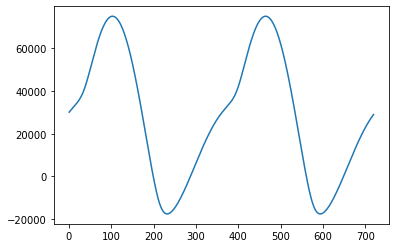

In [9]:
data = df.loc[(df['latitude'] == 45) & (df['longitude'] == 60)] \
    .sort_values('time_step')

import matplotlib.pyplot as plt

plt.plot(data['time_step'], data['principal1'])
data

In [19]:
import numpy as np
import legacy.StressEQs as stress1
import StressEquations as stress2

In [20]:
result1 = stress1.getStress(
    interior=1, 
    e_in=0.01, 
    colat=np.radians(45), 
    lon=np.radians(60), 
    steps=360, 
    this_step=5,
    oblq=0.1,
    phase=0.1,
    NSRdelta=42
)
print(result1)

result2 = stress2.getStress(
    interior_value='interior1', 
    e_in=0.01, 
    colat=np.radians(45), 
    lon=np.radians(60), 
    steps=360, 
    this_step=5,
    oblq=0.1,
    phase=0.1,
    NSRdelta=42
)
print(result2)

abs(np.array(result1) - np.array(result2))

(71.8810108076292, 3.2669857015654484)
(71.88101084929254, 3.2669857043257293)


array([4.16633412e-08, 2.76028089e-09])

In [21]:
import utils

value = utils.import_interior('interior1')
display(value)

In [22]:
value.modal_strengths

[-3.425221799746515e-12,
 -1.0256907477820026e-11,
 -1.4253580481622307e-11,
 -1.0926996197718631e-10,
 -5.768155893536122e-06,
 -3.247433460076046e-05]

In [23]:
import numpy as np

points = [
    (1, 1),
    (2, 3),
    (4, 5),
    (6, 7),
    (8, 8),
    (11, 6),
    (12, 4),
    (12, 1)
]
points = np.array(points)

In [24]:
import curves.fitCurves as fit

result = fit.fitCurve(points, 1)
result

[[array([1, 1]),
  array([4.17726084, 7.35452168]),
  array([12.        , 10.86410171]),
  array([12,  1])]]

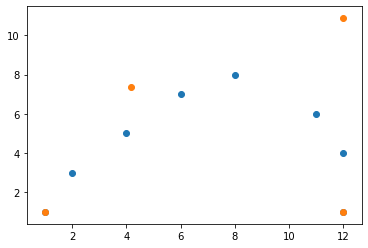

In [25]:
x = [point[0] for point in points]
y = [point[1] for point in points]

x2 = [point[0] for point in result[0]]
y2 = [point[1] for point in result[0]]

import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.scatter(x2, y2)

### Cubic Bezier Equation

$$B'(t) = (1 - t)^3P_0 + 3(1 - t)^2tP_1 + 3(1-t)t^2P_2 + t^3P_3, 0 \le t \le 1$$

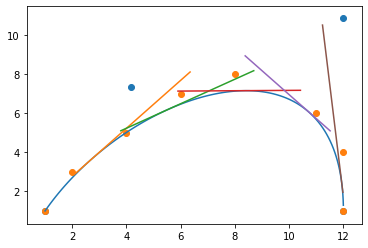

In [26]:
import numpy as np
import curves.bezier as bezier
import StressEquations as stress
import utils

curve = result[0]

bpoints = []
for t in np.arange(0, 1, 0.01):
    point = bezier.q(result[0], t)
    bpoints.append(point)
    
x = [point[0] for point in bpoints]
y = [point[1] for point in bpoints]

x2 = [point[0] for point in result[0]]
y2 = [point[1] for point in result[0]]

x3 = [point[0] for point in points]
y3 = [point[1] for point in points]

import matplotlib.pyplot as plt
plt.plot(x, y)
plt.scatter(x2, y2)
plt.scatter(x3, y3)

for time in np.arange(0.15, 1, 0.2):
    direction = bezier.findCubicRPoints(curve, time)
    dirX = [point[0] for point in direction]
    dirY = [point[1] for point in direction]
    plt.plot(dirX, dirY)


## Observed Cycloids

In [27]:
import pandas as pd

df = pd.read_csv("./obsData/AlexLonLatCut.txt", header=None, sep=' ', names=['lon', 'lat'])
df

,lon,lat
0,10.867,17.140
1,10.925,17.221
2,11.041,17.326
3,11.168,17.418
4,11.389,17.511
...,...,...
67,30.526,14.576
68,31.191,14.012
69,31.552,13.742
70,31.833,13.494


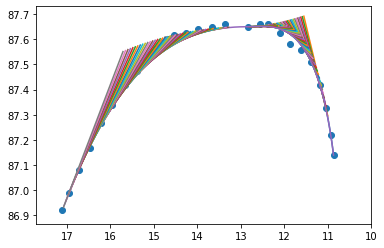

In [28]:
firstArc = df[0:26]

def translate(point):
    return (point[0], point[1] + 70)
    
points = np.array(firstArc)
points = np.array(list(map(translate, points)))

controls = fit.fitCurve(points, 0.05)


plt.xlim(17.7, 10)
# plt.ylim(15, 18)

plt.scatter(firstArc['lon'], firstArc['lat'] + 70)
# plt.scatter(x, y)

bpoints = []

for control in controls:
    for t in np.arange(0, 1, 0.01):
        point = bezier.q(control, t)
        bpoints.append(point)
    
    x = [point[0] for point in bpoints]
    y = [point[1] for point in bpoints]
    plt.plot(x, y)
    
    for time in np.arange(0.15, 1, 0.02):
        direction = bezier.findCubicRPoints(control, time)
        dirX = [point[0] for point in direction]
        dirY = [point[1] for point in direction]
        plt.plot(dirX, dirY)

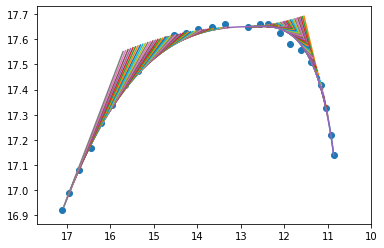

In [29]:
points = np.array(firstArc)

controls2 = fit.fitCurve(points, 0.05)


plt.xlim(17.7, 10)
# plt.ylim(15, 18)

plt.scatter(firstArc['lon'], firstArc['lat'])
# plt.scatter(x, y)

bpoints = []

for control in controls2:
    for t in np.arange(0, 1, 0.01):
        point = bezier.q(control, t)
        bpoints.append(point)
    
    x = [point[0] for point in bpoints]
    y = [point[1] for point in bpoints]
    plt.plot(x, y)
    
    for time in np.arange(0.15, 1, 0.02):
        direction = bezier.findCubicRPoints(control, time)
        dirX = [point[0] for point in direction]
        dirY = [point[1] for point in direction]
        plt.plot(dirX, dirY)

In [ ]:
points

In [ ]:
controls

# Try fitting Delphi

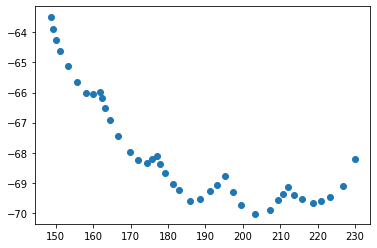

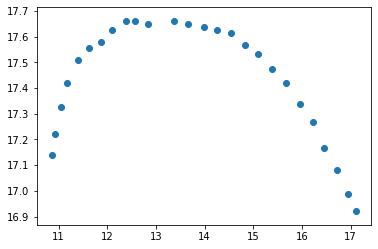

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import curves.bezier as bezier
import curves.fitCurves as fit
import curves.fitArcs as fitArcs
import StressTools as tools

def round_heading(value, base=5):
    return base * round(value / base)

def calculate_loss(frame):
    diffs = np.diff(frame.sort_values('pointNumber')['pointNumber'])
    
    edges = frame.iloc[[0, -1]]
    startDiff = edges.iloc[0].pointNumber - 1
    endDiff = 100 - edges.iloc[1].pointNumber
    
    diffs = np.append(diffs, [startDiff, endDiff])
    return max(diffs)

TOLERANCE = 1

delphi = pd.read_csv("./obsData/DelphiLonLatAT.txt", header=None, sep=' ', names=['lon', 'lat'])
delphi = delphi.sort_values(['lon', 'lat'])

plt.scatter(delphi['lon'], delphi['lat'])

plt.figure()

plt.scatter(firstArc['lon'], firstArc['lat'])


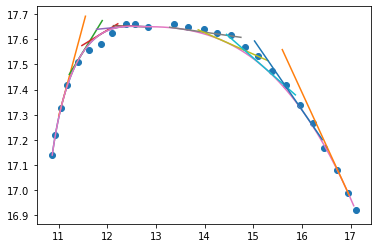

In [31]:
points = np.array(firstArc)

controls = fit.fitCurve(points, 0.05)

# plt.xlim(17.7, 10)
# plt.ylim(15, 18)

def findHeading(points, reverse = False):
    if reverse:
        origin = 1
        destination = 0
    else:
        origin = 0
        destination = 1
        
    rise = points[destination][1] - points[origin][1] # lats
    run = points[destination][0] - points[origin][0]  # lons
    
    degrees = np.degrees(np.arctan2(run, rise))
    if degrees < 0:
        degrees += 360
    return degrees if degrees > 180 else degrees + 180

bpoints = []
rows = []

plt.scatter(firstArc['lon'], firstArc['lat'])

pointNumber = 1
for control in controls:
    for t in np.arange(0, 1, 0.01):
        point = bezier.q(control, t)
        bpoints.append(point)
    
        heading = findHeading(bezier.findCubicRPoints(control, t), False)
        heading_reverse = findHeading(bezier.findCubicRPoints(control, t), True)
        rowData = {
            'pointNumber': pointNumber,
            'lon': point[0],
            'lat': point[1],
            'heading': heading,
            'headingCategory': round_heading(heading, TOLERANCE),
            'headingReverse': heading_reverse,
            'headingCategoryReverse': round_heading(heading_reverse, TOLERANCE)
        }
        rows.append(rowData)
        pointNumber += 1
        
    x = [point[0] for point in bpoints]
    y = [point[1] for point in bpoints]
    plt.plot(x, y)
    
    for time in np.arange(0.15, 1, 0.2):
        direction = bezier.findCubicRPoints(control, time)
        dirX = [point[0] for point in direction]
        dirY = [point[1] for point in direction]
        plt.plot(dirX, dirY)
        
df = pd.DataFrame(rows)
# df

In [32]:
def fit_arc(arc, max_error=0.05, reverse=False):
    points = np.array(arc)
    controls = fit.fitCurve(points, max_error)
    
    if reverse:
        controls = controls[::-1]
    
    rows = []
    pointNumber = 1
    for control in controls:
        if reverse:
            control.reverse()
        for time in np.arange(0, 1, 0.01):
            point = bezier.q(control, time)

            heading = findHeading(bezier.findCubicRPoints(control, time))
            rows.append({
                'pointNumber': pointNumber,
                'lon': point[0],
                'lat': point[1],
                'heading': heading,
                'headingCategory': round_heading(heading, TOLERANCE)
            })
            pointNumber += 1
                
    return pd.DataFrame(rows)

### Generate stress field based on our list of coordinates

In [33]:
import StressEquations as stress
import utils

interior = utils.import_interior('interior1')

stresses = []


for point in df.itertuples():
    for step in range(360):
        current = stress.getStress(
            interior_value=interior, 
            e_in=0.01, 
            colat=np.radians(90-point.lat), 
            lon=np.radians(360-point.lon), 
            steps=360, 
            this_step=step,
            oblq=0.25,
            phase=90,
            NSRdelta=0)
        heading_degrees = np.degrees(current[1])
        stresses.append({
            'lon': point.lon,
            'lat': point.lat,
            'stress': current[0],
            'heading': heading_degrees,
            'headingCategory': round_heading(heading_degrees, TOLERANCE),
            'time': step
        })
        
stressFrame = pd.DataFrame(stresses)


In [34]:
def build_stress_field(interior, pointFrame, phase):
    for point in pointFrame.itertuples():
        for step in range(360):
            current = stress.getStress(
                interior_value=interior, 
                e_in=0.01, 
                colat=np.radians(90-point.lat), 
                lon=np.radians(360-point.lon), 
                steps=360, 
                this_step=step,
                oblq=0.25,
                phase=np.radians(phase),
                NSRdelta=0)
            heading_degrees = np.degrees(current[1])
            stresses.append({
                'lon': point.lon,
                'lat': point.lat,
                'stress': current[0],
                'heading': heading_degrees,
                'headingCategory': round_heading(heading_degrees, TOLERANCE),
                'time': step
            })

    return pd.DataFrame(stresses)

### Search for matches in headings between curve and stress field

In [35]:
# Forward propagation

merged = df.merge(
    stressFrame,
    how='left',
    on=['lon', 'lat', 'headingCategory']
)

In [36]:
# merged.loc[not df.isnull(merged['stress'])]
merged = merged.loc[merged['stress'] > 0]
merged['maxStress'] = merged.groupby('pointNumber')['stress'].transform('max')
merged_unique = merged.loc[merged['stress'] == merged['maxStress']]

calculate_loss(merged_unique)

128.0

In [37]:
def match_orientations(curve, stresses):
    merged = curve.merge(
        stresses,
        how='left',
        on=['lon', 'lat', 'headingCategory']
    )
    merged = merged.loc[merged['stress'] > 0]
    merged['maxStress'] = merged.groupby('pointNumber')['stress'].transform('max')
    merged_unique = merged.loc[merged['stress'] == merged['maxStress']]
    
    return merged_unique

In [38]:
# Reverse propagation

# merged = df.merge(
#     stressFrame,
#     how='left',
#     left_on=['lon', 'lat', 'headingCategoryReverse'],
#     right_on=['lon', 'lat', 'headingCategory']
# )

# print(len(merged))
# merged.loc[merged['stress'] > 0]

# # merged.groupby(['lon', 'lat']).size()
# # merged = merged.loc[merged['stress'] > 0]
# merged['maxStress'] = merged.groupby(['lon', 'lat'])['stress'].transform('max')

# merged_unique = merged.loc[merged['stress'] == merged['maxStress']]
# display(merged_unique)
# display(merged)


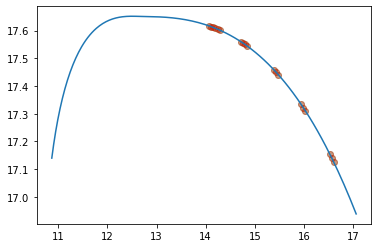

In [39]:
plt.scatter(merged_unique['lon'], merged_unique['lat'], alpha=0.3, color='green')

positive = merged_unique.loc[merged_unique['stress'] > 0]
plt.scatter(positive['lon'], positive['lat'], alpha=0.3, color='red')

x = [point[0] for point in bpoints]
y = [point[1] for point in bpoints]
plt.plot(x, y)

### Brute force search phases

In [24]:
results = []

for phase in range(0, 360, 20):
    field = build_stress_field(interior, df, phase)
    matches = match_orientations(df, field)
    loss = calculate_loss(matches)
    
    results.append({
        'phase': phase,
        'error': loss
    })
    print(f'Calculated for phase {phase}')
    
results = pd.DataFrame(results)
results

Calculated for phase 0
Calculated for phase 20
Calculated for phase 40
Calculated for phase 60
Calculated for phase 80
Calculated for phase 100
Calculated for phase 120
Calculated for phase 140
Calculated for phase 160
Calculated for phase 180
Calculated for phase 200
Calculated for phase 220
Calculated for phase 240
Calculated for phase 260
Calculated for phase 280
Calculated for phase 300
Calculated for phase 320
Calculated for phase 340


,phase,error
0,0,9.0
1,20,9.0
2,40,9.0
3,60,9.0
4,80,9.0
5,100,9.0
6,120,9.0
7,140,9.0
8,160,9.0
9,180,9.0


In [40]:
def test_arc(arc, phase_increment):
    results = []

    for phase in range(0, 361, phase_increment):
        field = build_stress_field(interior, arc, phase)
        matches = match_orientations(arc, field)
        loss = calculate_loss(matches)

        results.append({
            'phase': phase,
            'error': loss
        })
        print(f'Calculated for phase {phase}')

    return pd.DataFrame(results) 
    

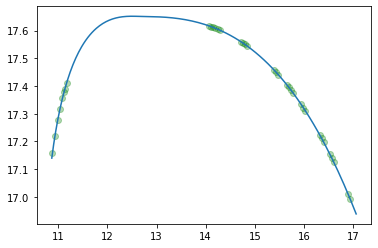

In [41]:
field = build_stress_field(interior, df, 300)
matches = match_orientations(df, field)

plt.scatter(matches['lon'], matches['lat'], alpha=0.3, color='green')

x = [point[0] for point in bpoints]
y = [point[1] for point in bpoints]
plt.plot(x, y)

(array([12.,  1.,  8.,  1.,  5.,  1.,  1.,  4.,  0.,  3.]),
 array([ 2.45716441,  6.4894701 , 10.52177579, 14.55408148, 18.58638717,
        22.61869286, 26.65099856, 30.68330425, 34.71560994, 38.74791563,
        42.78022132]),
 <a list of 10 Patch objects>)

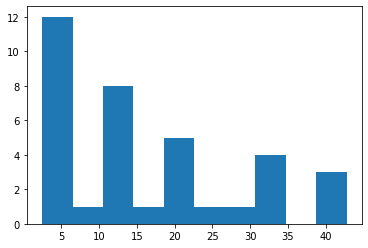

In [42]:
plt.hist(matches['stress'])

<BarContainer object of 36 artists>

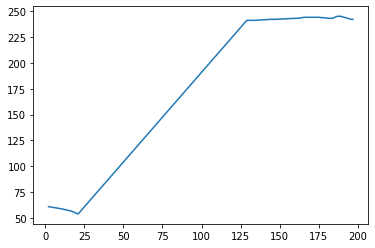

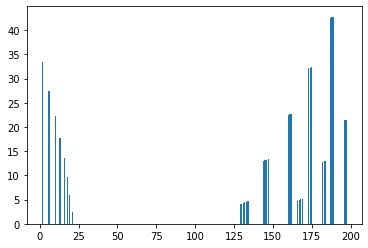

In [43]:
plt.plot(matches['pointNumber'], matches['time'])
plt.figure()
plt.bar(matches['pointNumber'], matches['stress'])

### Experiment: Reversing the control points in a Bezier results in the same exact curve

[array([12.838, 17.65 ]),
 array([14.32154658, 17.65      ]),
 array([15.73825601, 17.54916224]),
 array([17.106, 16.92 ])]

[array([17.106, 16.92 ]),
 array([15.73825601, 17.54916224]),
 array([14.32154658, 17.65      ]),
 array([12.838, 17.65 ])]

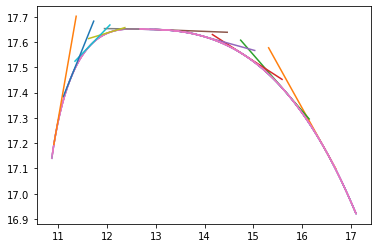

In [44]:
control_rev = control[::-1]
display(control)
display(control_rev)

for control in controls[::-1]:
    control.reverse()
    for t in np.arange(0, 1, 0.01):
        point = bezier.q(control, t)
        bpoints.append(point)
    
    x = [point[0] for point in bpoints]
    y = [point[1] for point in bpoints]
    plt.plot(x, y)
    
    for time in np.arange(0.15, 1, 0.2):
        direction = bezier.findCubicRPoints(control, time)
        dirX = [point[0] for point in direction]
        dirY = [point[1] for point in direction]
        plt.plot(dirX, dirY)

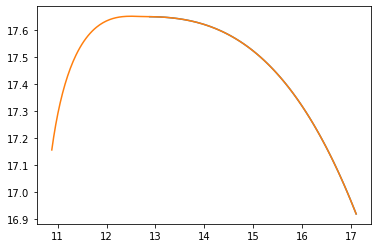

In [45]:
controls = fit.fitCurve(points, 0.05)

bpoints = []
rows = []

pointNumber = 1
for control in controls[::-1]:
    control.reverse()

    for t in np.arange(0, 1, 0.01):
        point = bezier.q(control, t)
        bpoints.append(point)
    
        heading = findHeading(bezier.findCubicRPoints(control, t), False)
        heading_reverse = findHeading(bezier.findCubicRPoints(control, t), True)
        rowData = {
            'pointNumber': pointNumber,
            'lon': point[0],
            'lat': point[1],
            'heading': heading,
            'headingCategory': round_heading(heading, TOLERANCE),
            'headingReverse': heading_reverse,
            'headingCategoryReverse': round_heading(heading_reverse, TOLERANCE)
        }
        rows.append(rowData)
        pointNumber += 1
        
    x = [point[0] for point in bpoints]
    y = [point[1] for point in bpoints]
    plt.plot(x, y)
        
df_reverse = pd.DataFrame(rows)

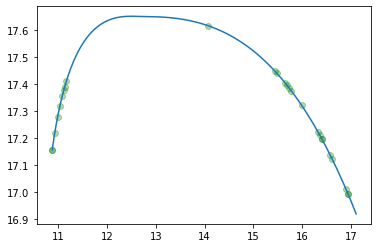

In [46]:
field = build_stress_field(interior, df_reverse, 300)
matches = match_orientations(df_reverse, field)

plt.scatter(matches['lon'], matches['lat'], alpha=0.3, color='green')

x = [point[0] for point in bpoints]
y = [point[1] for point in bpoints]
plt.plot(x, y)

<BarContainer object of 26 artists>

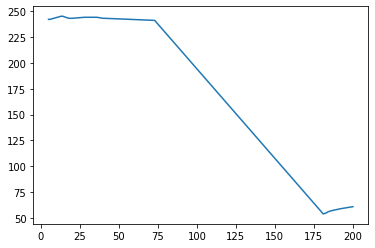

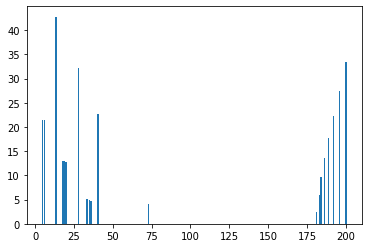

In [47]:
plt.plot(matches['pointNumber'], matches['time'])
plt.figure()
plt.bar(matches['pointNumber'], matches['stress'])

In [48]:
display(df)
display(df_reverse)

,pointNumber,lon,lat,heading,headingCategory,headingReverse,headingCategoryReverse
0,1,10.867000,17.140000,215.604534,216.0,215.604534,216.0
1,2,10.879353,17.156840,216.919578,217.0,216.919578,217.0
2,3,10.892025,17.173310,218.229722,218.0,218.229722,218.0
3,4,10.905010,17.189413,219.533501,220.0,219.533501,220.0
4,5,10.918302,17.205152,220.829487,221.0,220.829487,221.0
...,...,...,...,...,...,...,...
195,196,16.900469,17.010465,292.813293,293.0,292.813293,293.0
196,197,16.941635,16.992991,293.188469,293.0,293.188469,293.0
197,198,16.982770,16.975210,293.565040,294.0,293.565040,294.0
198,199,17.023876,16.957119,293.942937,294.0,293.942937,294.0


,pointNumber,lon,lat,heading,headingCategory,headingReverse,headingCategoryReverse
0,1,17.106000,16.920000,294.702430,295.0,294.702430,295.0
1,2,17.064953,16.938717,294.322091,294.0,294.322091,294.0
2,3,17.023876,16.957119,293.942937,294.0,293.942937,294.0
3,4,16.982770,16.975210,293.565040,294.0,293.565040,294.0
4,5,16.941635,16.992991,293.188469,293.0,293.188469,293.0
...,...,...,...,...,...,...,...
195,196,10.931897,17.220533,222.116300,222.0,222.116300,222.0
196,197,10.918302,17.205152,220.829487,221.0,220.829487,221.0
197,198,10.905010,17.189413,219.533501,220.0,219.533501,220.0
198,199,10.892025,17.173310,218.229722,218.0,218.229722,218.0


In [49]:
controls

[[array([12.838, 17.65 ]),
  array([12.21896038, 17.65      ]),
  array([11.27341366, 17.7075777 ]),
  array([10.867, 17.14 ])],
 [array([17.106, 16.92 ]),
  array([15.73825601, 17.54916224]),
  array([14.32154658, 17.65      ]),
  array([12.838, 17.65 ])]]

## Lets try to do the entire cycloid

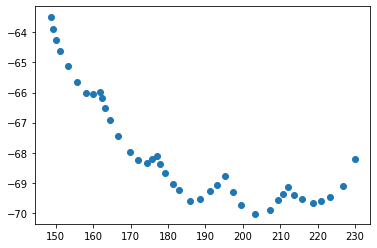

In [50]:
plt.scatter(delphi['lon'], delphi['lat'])

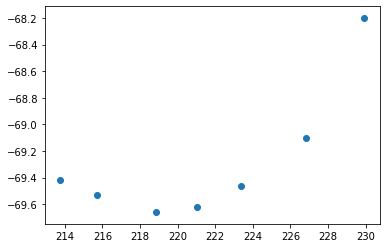

In [51]:
temp = delphi[34:]

plt.scatter(temp['lon'], temp['lat'])

In [52]:
arcs = [
    delphi[0:9],
    delphi[9:18],
    delphi[18:27],
    delphi[27:34],
    delphi[34:]
]

In [1]:
all_curves = None
all_arcs = None

for arc in arcs:
    curve = fit_arc(arc)
    all_curves = curve if all_curves is None else pd.concat([all_curves, curve], ignore_index=True)
    field = get_stress_field(interior, curve, 300)
        
    matches = match_orientations(curve, field)
    all_arcs = matches if all_arcs is None else pd.concat([all_arcs, matches], ignore_index=True)
    print("Finished an arc...")


NameError: name 'arcs' is not defined

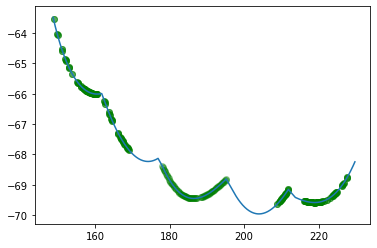

In [60]:
plt.plot(all_curves['lon'], all_curves['lat'])
# plt.scatter(delphi['lon'], delphi['lat'])
plt.scatter(all_arcs['lon'], all_arcs['lat'], alpha=0.3, color='green')

In [58]:
curve = fit_arc(arcs[2])
results = test_arc(curve, 10)
display(results)

Calculated for phase 0
Calculated for phase 10
Calculated for phase 20
Calculated for phase 30
Calculated for phase 40
Calculated for phase 50
Calculated for phase 60
Calculated for phase 70
Calculated for phase 80
Calculated for phase 90
Calculated for phase 100
Calculated for phase 110
Calculated for phase 120
Calculated for phase 130
Calculated for phase 140
Calculated for phase 150
Calculated for phase 160
Calculated for phase 170
Calculated for phase 180
Calculated for phase 190
Calculated for phase 200
Calculated for phase 210
Calculated for phase 220
Calculated for phase 230
Calculated for phase 240
Calculated for phase 250
Calculated for phase 260
Calculated for phase 270
Calculated for phase 280
Calculated for phase 290
Calculated for phase 300
Calculated for phase 310
Calculated for phase 320
Calculated for phase 330
Calculated for phase 340
Calculated for phase 350
Calculated for phase 360


,phase,error
0,0,56.0
1,10,45.0
2,20,13.0
3,30,9.0
4,40,9.0
5,50,9.0
6,60,9.0
7,70,9.0
8,80,9.0
9,90,9.0


# ~TODO: Add diffs to stress field frame to determine increase or decrease~
# TODO: Allow heading match tolerance < 1 degree


In [74]:
all_arcs

,pointNumber,lon,lat,heading_x,headingCategory,stress,heading_y,time,maxStress
0,2,148.749713,-63.543963,297.886436,298.0,132.472097,297.532406,69.0,132.472097
1,10,149.723525,-64.020841,294.330025,294.0,121.197096,293.588114,68.0,121.197096
2,11,149.847167,-64.076188,293.900534,294.0,121.197954,293.664491,68.0,121.197954
3,20,150.977326,-64.533298,290.189759,290.0,111.002725,290.277362,67.0,111.002725
4,21,151.104710,-64.579642,289.794762,290.0,111.018365,290.381566,67.0,111.018365
...,...,...,...,...,...,...,...,...,...
268,87,227.677066,-68.761532,258.023047,258.0,81.491614,258.386525,241.0,81.491614
269,88,227.837606,-68.727064,257.741971,258.0,41.803118,258.352876,207.0,41.803118
270,93,228.641089,-68.542007,256.313399,256.0,47.904788,256.163069,206.0,47.904788
271,94,228.801959,-68.502400,256.023348,256.0,48.063940,256.334907,206.0,48.063940


# Let's do this cleaner

In [1]:
import pandas as pd
# import matplotlib.pyplot as plt
import numpy as np
import curves.bezier as bezier
import curves.fitCurves as fit
import StressTools as tools
import utils
import fitting

interior = utils.import_interior('interior1')

TOLERANCE = 1

delphi = pd.read_csv("./obsData/DelphiLonLatAT.txt", header=None, sep=' ', names=['lon', 'lat'])
delphi = delphi.sort_values(['lon', 'lat'])

arcs = [
    delphi[0:9],
    delphi[9:18],
    delphi[18:27],
    delphi[27:34],
    delphi[34:]
]


all_curves = None
all_arcs = None
all_stress = None

for index, arc in enumerate(arcs):
    startingPoint = index * 100 + 1
    curve = fitting.fit_arc(arc, startingPoint=startingPoint)
    curve['lon'] = curve['lon'] + 60
    all_curves = curve if all_curves is None else pd.concat([all_curves, curve], ignore_index=True)
    field = tools.get_simon_stress_field(
        interior, 
        curve, 
        90,
        0.01,
        0.44,
        0,
        is_async=True, 
        steps=850)
        
    matches = fitting.match_orientations(curve, field, positive_only=True)
    all_arcs = matches if all_arcs is None else pd.concat([all_arcs, matches], ignore_index=True)
    all_stress = field if all_stress is None else pd.concat([all_stress, field], ignore_index=True)
    print("Finished an arc...")

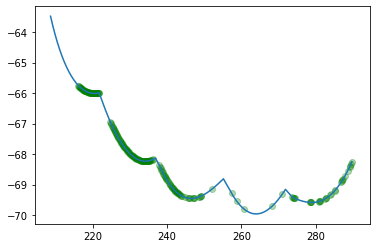

In [3]:
import matplotlib.pyplot as plt

plt.plot(all_curves['lon'], all_curves['lat'])
plt.scatter(all_arcs['lon'], all_arcs['lat'], alpha=0.3, color='green')

In [4]:
fit_data = fitting.test_arc(
    all_curves, 
    10, 
    interior,
    0.01,
    0.44,
    0,
    steps=850, 
    positive_only=True)

Calculated for phase 0
Calculated for phase 10
Calculated for phase 20
Calculated for phase 30
Calculated for phase 40
Calculated for phase 50
Calculated for phase 60
Calculated for phase 70
Calculated for phase 80
Calculated for phase 90
Calculated for phase 100
Calculated for phase 110
Calculated for phase 120
Calculated for phase 130
Calculated for phase 140
Calculated for phase 150
Calculated for phase 160
Calculated for phase 170
Calculated for phase 180
Calculated for phase 190
Calculated for phase 200
Calculated for phase 210
Calculated for phase 220
Calculated for phase 230
Calculated for phase 240
Calculated for phase 250
Calculated for phase 260
Calculated for phase 270
Calculated for phase 280
Calculated for phase 290
Calculated for phase 300
Calculated for phase 310
Calculated for phase 320
Calculated for phase 330
Calculated for phase 340
Calculated for phase 350
Calculated for phase 360


,phase,error
0,0,154.0
1,10,167.0
2,20,187.0
3,30,199.0
4,40,152.0
5,50,143.0
6,60,105.0
7,70,72.0
8,80,88.0
9,90,58.0


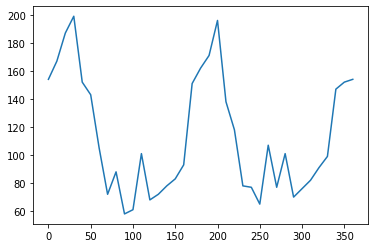

In [5]:
plt.plot(fit_data['phase'], fit_data['error'])
display(fit_data)

In [3]:
error = fitting.find_heading_error(all_curves, all_stress)

(array([385.,  37.,  15.,  10.,  10.,   9.,   9.,   7.,   2.,  16.]),
 array([1.12931207e-03, 3.86888112e+00, 7.73663292e+00, 1.16043847e+01,
        1.54721365e+01, 1.93398883e+01, 2.32076401e+01, 2.70753920e+01,
        3.09431438e+01, 3.48108956e+01, 3.86786474e+01]),
 <a list of 10 Patch objects>)

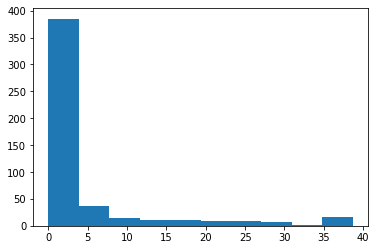

In [4]:
plt.hist(error['deltaHeading'])

In [15]:
ITERATIONS = 1
BATCH_SIZE = 32

# params = np.array([90, 0.44, 30]) # phase, obliquity, longitude
params = np.array([0.25, 0.07, 0.15]) # phase, obliquity, longitude
min_vals = np.array([0, 0, 1])
max_vals = np.array([360, np.pi * 2, 180])

def gradient(batch):
    variables = params * max_vals + min_vals
    test_data = batch.copy()
    test_data['lon'] = test_data['lon'] + variables[2]
    
    field = tools.get_simon_stress_field(
        interior, 
        test_data, 
        phase=variables[0],
        eccentricity=0.01,
        obliquity=variables[1],
        nsr=0,
        is_async=True, 
        steps=850)
    error = fitting.find_heading_error(test_data, field)
    heading_error = error['deltaHeading']
    norm_error = (heading_error - heading_error.min()) / (heading_error.max() - heading_error.min())

    return norm_error, field

for iter in range(1, ITERATIONS + 1):
    batch = all_curves.sample(BATCH_SIZE)
    result, field = gradient(batch)
    


________________________________________________________________________________
[Memory] Calling StressTools.build_simon_stress_field...
build_simon_stress_field(<utils.Interior object at 0x7f84e0b0b3d0>,      pointNumber         lon        lat     heading  headingCategory
213          214  268.189861 -68.898716  280.821546            281.0
412          413  303.744498 -69.518009  272.340047            272.0
79            80  246.993819 -65.984548  272.189180            272.0
413          414  303.908829 -69.524591  272.246235            272.0
377          378  296.651553 -69.666778  263.018020            263.0
327          328  289.354657 -69.861349  274.526766            275.0
326          327  289.208371 -69.849429  274.790157            275.0
32            33  240.657805 -65.069841  285.324300            285.0
188          189  263.193801 -68.218868  268.317429            268.0
178       ..., phase=90.0, eccentricity=0.01, obliquity=0.4398229715025711, nsr=0, is_async=True, steps=

In [6]:
def loss(params):
    print(f"Running loss function with params {params}")
    phase, obliquity, longitude = params
    test_data = all_curves.copy()
    test_data['lon'] = test_data['lon'] + longitude
    
    field = tools.get_simon_stress_field(
        interior, 
        test_data, 
        phase=phase,
        eccentricity=0.01,
        obliquity=obliquity,
        nsr=0,
        is_async=True, 
        steps=360)
    error = fitting.find_heading_error(test_data, field)
    result = error['deltaHeading']
    
    root_mean_squared_error = np.sqrt(np.sum(np.power(result, 2))) / result.shape[0]
    
    print(f'Loss Output: {root_mean_squared_error}')
    return root_mean_squared_error

def loss_der(params):
    phase, obliquity, longitude = params
    test_data = all_curves.copy()
    test_data['lon'] = test_data['lon'] + longitude
    
    field = tools.get_simon_stress_field(
        interior, 
        test_data, 
        phase=phase,
        eccentricity=0.01,
        obliquity=obliquity,
        nsr=0,
        is_async=True, 
        steps=360)
    error = fitting.find_heading_error(test_data, field)
    result = error['deltaHeading']    
    
    # calculate jacobian
    diffs = np.insert(np.diff(result), 0, result.iloc[0], axis=0)
    jac = np.array([[error/param for param in params] for error in diffs])
    
    root_mean_squared_error = np.sqrt(np.sum(np.power(result, 2))) / result.shape[0]

    loss_vector = np.array([root_mean_squared_error/error for error in result])
    
    return loss_vector @ jac

  

In [7]:
from scipy.optimize import minimize


initial = [90, 0.44, 60]
opt = minimize(loss, initial, method='L-BFGS-B', jac=loss_der,
               bounds=[(0, 360), (0, 1), (0, 360)],
               options={ 'maxiter': 5000, 'disp': 1})

Running loss function with params [90.    0.44 60.  ]
Loss Output: 0.3411638430737436
Running loss function with params [91.97226475  1.         62.95839713]
Loss Output: 0.3850077379683605
Running loss function with params [90.56414634  0.60018232 60.8462195 ]
Loss Output: 0.35271823789109646
Running loss function with params [90.15819055  0.48491624 60.23728583]
Loss Output: 0.35424203677252747
Running loss function with params [90.04098493  0.45163716 60.0614774 ]
Loss Output: 0.3501917910917616
Running loss function with params [90.00685361  0.441946   60.01028042]
Loss Output: 0.34283886540086744
Running loss function with params [90.00175594  0.44049858 60.00263392]
Loss Output: 0.3414344835012022
Running loss function with params [90.00047017  0.4401335  60.00070525]
Loss Output: 0.34123303432832913
Running loss function with params [90.00012432  0.4400353  60.00018648]
Loss Output: 0.34118198506776376
Running loss function with params [90.00002293  0.44000651 60.00003439]
Loss 

In [11]:
result = loss([90, 0.44, 60])

In [12]:
result

0.32359810520777293

In [72]:
opt

      fun: 0.3411638430737895
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([  -1.97226475, -403.41779017,   -2.95839713])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 21
      nit: 0
   status: 2
  success: False
        x: array([90.  ,  0.44, 60.  ])

In [6]:
loss([89.98245796,  0.36734444, 59.99706506])

0.33778615223444164

In [14]:
def stress_match(params):
    phase, obliquity, longitude = params
    test_data = all_curves.copy()
    test_data['lon'] = test_data['lon'] + longitude
    
    field = tools.get_simon_stress_field(
        interior, 
        test_data, 
        phase=phase,
        eccentricity=0.01,
        obliquity=np.radians(obliquity),
        nsr=0,
        is_async=True, 
        steps=360)
    result = fitting.find_heading_error(test_data, field)
    
    return result

In [19]:
result = stress_match([89.98245796,  0.36734444, 59.99706506])

## Trying out Adam optimizer

In [1]:
min_vals = np.array([0, 0.01])
max_vals = np.array([360, 1])

def objective(batch, params):
#     print(f"Running objective function with params {params}")
    variables = params * (max_vals - min_vals) + min_vals # denormalize
    phase, obliquity = variables
    test_data = batch.copy()
#     test_data['lon'] = test_data['lon'] + longitude
    
    field = tools.get_simon_stress_field(
        interior, 
        test_data, 
        phase=phase,
        eccentricity=0.01,
        obliquity=np.radians(obliquity),
        nsr=0,
        is_async=True, 
        steps=360)
    error = fitting.find_heading_error(test_data, field)
    if len(error) == 0:
        print('NO Positive Stresses found!')
        print(variables)
        
    result = error['deltaHeading']
    
    root_mean_squared_error = np.sqrt(np.sum(np.power(result, 2))) / result.shape[0]
    
     # calculate jacobian & gradient
    diffs = np.insert(np.diff(result), 0, result.iloc[0], axis=0)
    jac = np.array([[(-1*error)/param for param in params] for error in diffs])
    loss_vector = np.array([root_mean_squared_error/error for error in result])
    gradient = loss_vector @ jac
    
    print(f'Loss Output: {root_mean_squared_error}')
    
    return root_mean_squared_error, gradient

NameError: name 'np' is not defined

In [7]:
alpha = 1e-3
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

ITERATIONS = 180
CONVERGE_THRESHOLD = 0.01
BATCH_SIZE = 32

params = np.array([0.25, 0.07]) # phase, obliquity

best_case = dict(loss=100, parameters=params)
worst_case = dict(loss=0, parameters=params)
losses = []

# variables = params * max_vals + min_vals

moment = [np.zeros_like(params)]
raw_moment = [np.zeros_like(params)]


# for iteration in range(1, ITERATIONS + 1):
loss = 100
iteration = 1
while loss > CONVERGE_THRESHOLD and iteration < ITERATIONS:
    batch = all_curves.sample(BATCH_SIZE)
    
    loss, gradient = objective(batch, params)
    
    losses.append(loss)
    if loss < best_case['loss']:
        best_case['loss'] = loss
        best_case['parameters'] = params
        
    if loss > worst_case['loss']:
        worst_case['loss'] = loss
        worst_case['parameters'] = params
    
    
    moment.append(beta1 * moment[iteration - 1] + (1. - beta1) * gradient)
    raw_moment.append(beta2 * raw_moment[iteration - 1]  + (1. - beta2) * gradient**2)
    
#     corrected_moment = moment[iteration]/(1. - beta1**iteration)
#     corrected_raw = raw_moment[iteration]/(1. - beta2**iteration)
    
    learning_rate = alpha * (np.sqrt(1. - beta2**iteration)/(1. - beta1**iteration))
    params = params - learning_rate * moment[iteration]/(np.sqrt(raw_moment[iteration]) + epsilon)
#     params = params - alpha * corrected_moment/(np.sqrt(corrected_raw) + epsilon)
    params[params >=  1] = 1
    params[params <= 0] = epsilon
    
    iteration += 1
    
    

Loss Output: 0.026049483813718737
Loss Output: 0.024914882905429373
Loss Output: 0.030116872591156023
Loss Output: 0.02835961698276721
Loss Output: 0.02376126445782041
Loss Output: 0.029414972936448104
Loss Output: 0.034800763659049876
Loss Output: 0.025317977538148
Loss Output: 0.026048861789352885
Loss Output: 0.02696988981507881
Loss Output: 0.02740505621885699
Loss Output: 0.023607044329352324
Loss Output: 0.025163648299438214
Loss Output: 0.028255562791714667
Loss Output: 0.02569489576589776
Loss Output: 0.026043456409887707
Loss Output: 0.023945392412775556
Loss Output: 0.03017324362595049
Loss Output: 0.02519340968591447
Loss Output: 0.024911742455528615
Loss Output: 0.027307075658848948
Loss Output: 0.02509980436200674
Loss Output: 0.027467140540983523
Loss Output: 0.020411265985674977
Loss Output: 0.027533445293844692
Loss Output: 0.02595384505186029
Loss Output: 0.02344416409308457
Loss Output: 0.03031302491799449
Loss Output: 0.027745003562005204
Loss Output: 0.0272188616220

In [8]:
variables = best_case['parameters'] * (max_vals - min_vals) + min_vals
bad_vars = worst_case['parameters'] * (max_vals - min_vals) + min_vals
print(variables)
print(bad_vars)

[6.41851133e+01 1.00000099e-02]
[8.79959077e+01 7.37962378e-02]


In [9]:
display(best_case)
display(worst_case)

{'loss': 0.01998710280651097,
 'parameters': array([1.78291981e-01, 1.00000000e-08])}

{'loss': 0.034800763659049876, 'parameters': array([0.24443308, 0.06444064])}

In [10]:
variables = np.append(variables, 0)
bad_vars = np.append(bad_vars, 0)

data = stress_match(variables)
bad_data = stress_match(bad_vars)


In [14]:
data = stress_match([0, 0, 0])

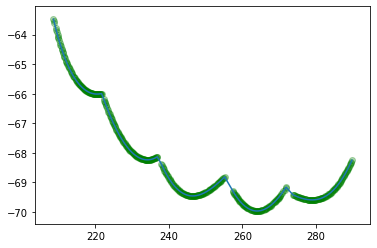

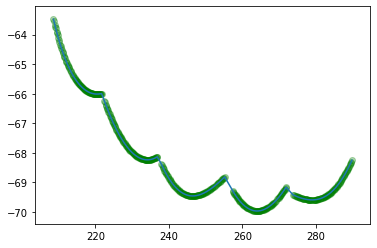

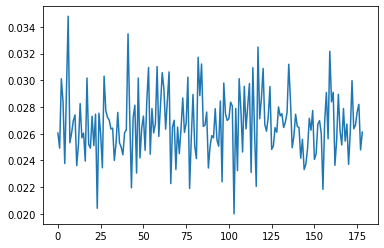

In [15]:
import matplotlib.pyplot as plt


fit_points = data.loc[data['deltaHeading'] < 0.25].copy()

fit_points['lon'] = fit_points['lon'] - variables[2]
plt.plot(all_curves['lon'], all_curves['lat'])
plt.scatter(fit_points['lon'], fit_points['lat'], alpha=0.3, color='green')

plt.figure()

fit_points = bad_data.loc[bad_data['deltaHeading'] < 0.25].copy()

fit_points['lon'] = fit_points['lon'] - bad_vars[2]
plt.plot(all_curves['lon'], all_curves['lat'])
plt.scatter(fit_points['lon'], fit_points['lat'], alpha=0.3, color='green')

plt.figure()

plt.plot(losses)

In [12]:
variables

array([6.41851133e+01, 1.00000099e-02, 0.00000000e+00])

In [13]:
fit_points

,pointNumber,lon,lat,time,heading_x,heading_y,stress,deltaHeading,deltaStress
357,1,208.630000,-63.480000,357,298.345694,298.282294,25.351059,0.063400,-0.198771
716,2,208.749713,-63.543963,356,297.886436,297.653164,25.480335,0.233272,-0.218779
1435,4,208.990520,-63.668951,355,296.977563,297.142916,25.562144,0.165353,-0.238615
1794,5,209.111601,-63.729988,354,296.528006,296.517055,25.733288,0.010952,-0.258618
2153,6,209.233126,-63.790061,353,296.081739,295.892977,25.925055,0.188762,-0.278553
...,...,...,...,...,...,...,...,...,...
178320,496,289.123896,-68.420528,120,255.439262,255.592443,84.772697,0.153180,0.352114
178679,497,289.284967,-68.378249,119,255.145319,255.323470,84.463813,0.178151,0.363585
179038,498,289.446110,-68.335064,118,254.850169,255.057000,84.144100,0.206832,0.375085
179396,499,289.607328,-68.290966,116,254.553858,254.370475,83.426926,0.183383,0.398621


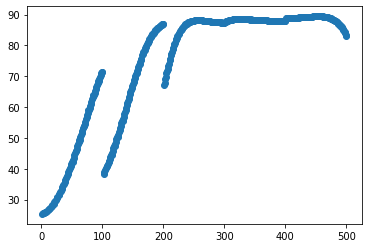

In [16]:
plt.scatter(fit_points['pointNumber'], fit_points['stress'])

## Adam optimizer from `fitting` module

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import curves.bezier as bezier
import curves.fitCurves as fit
import StressTools as tools
import utils
import fitting

interior = utils.import_interior('interior1')

TOLERANCE = 1

min_vals = np.array([0, 0.1, 0])
max_vals = np.array([360, 1, 360])
constraints = [
    dict(wrapValues=True, minValue=1e-8, maxValue=1),
    dict(minValue=1e-8, maxValue=1),
    dict(minValue=0, maxValue=1)
]

delphi = pd.read_csv("./obsData/DelphiLonLatAT.txt", header=None, sep=' ', names=['lon', 'lat'])
delphi = delphi.sort_values(['lon', 'lat'])

arcs = [
    delphi[0:9],
    delphi[9:18],
    delphi[18:27],
    delphi[27:34],
    delphi[34:]
]


all_curves = None

for index, arc in enumerate(arcs):
    startingPoint = index * 100 + 1
    curve = fitting.fit_arc(arc, startingPoint=startingPoint, output_points=100)
    all_curves = curve if all_curves is None else pd.concat([all_curves, curve], ignore_index=True)
    

alex = pd.read_csv("./obsData/AlexLonLatCut.txt", header=None, sep=' ', names=['lon', 'lat'])
alex = alex.sort_values(['lon', 'lat'])


arcs = [
    alex[0:26],
    alex[26:50],
    alex[50:]
]

alex_curves = None
for index, arc in enumerate(arcs):
    startingPoint = alex_curves.shape[0] + 1 if alex_curves is not None else 1
    curve = fitting.fit_arc(arc, startingPoint=startingPoint, output_points=100, max_error=0.01135)
    alex_curves = curve if alex_curves is None else pd.concat([alex_curves, curve], ignore_index=True)


In [2]:
import fitting
import matplotlib.pyplot as plt

def check_fit(params, minVals, maxVals, curve, interior, tolerance=0.25):
    if len(params) == 3:
        variables = params * (max_vals - min_vals) + min_vals # denormalize
    else:
        variables = params * (max_vals[0:2:] - min_vals[0:2:]) + min_vals[0:2:]
        
    plt.figure()
    data = fitting.match_stresses(curve, variables, interior)
    fit_points = data.loc[data['deltaHeading'] < tolerance].copy()
    
    if len(variables) >= 3:
        fit_points['lon'] = fit_points['lon'] - variables[2]
    
    plt.plot(curve['lon'], curve['lat'])
    plt.scatter(fit_points['lon'], fit_points['lat'], alpha=0.3, color='green')
    
    plt.figure()
    
    plt.scatter(fit_points['pointNumber'], fit_points['stress'])
    
    print(np.array(variables))

In [16]:
import fitting

numParams = 3
# start_params = [np.random.rand() for iter in range(numParams)]
# start_params = [0.2896670862267282, 0.5283622484787509, 0.9282830635227807]
start_params = [3.60000000e-06, 4.93111041e-01, 8.31677514e+01]

adam = fitting.Adam(alpha=1.e-2)
opt = adam.minimize(
    fitting.test_stress_parameters, 
    all_curves, 
    start_params, 
    interior, 
    constraints=constraints,
    max_iterations=2500,
    verbose=True
)

Iteration 1/2500 -- Loss Output: 0.027083000424325956 -- Moving Avg Loss: 0.027083000424325956
Iteration 2/2500 -- Loss Output: 0.0401501012038865 -- Moving Avg Loss: 0.03361655081410623
Iteration 3/2500 -- Loss Output: 0.040011671336486025 -- Moving Avg Loss: 0.035748257654899494
Iteration 4/2500 -- Loss Output: 0.04684810178179813 -- Moving Avg Loss: 0.03852321868662415
Iteration 5/2500 -- Loss Output: 0.04701366384464487 -- Moving Avg Loss: 0.040221307718228294
Iteration 6/2500 -- Loss Output: 0.05104422595069212 -- Moving Avg Loss: 0.04202512742363893
Iteration 7/2500 -- Loss Output: 0.04641806787308899 -- Moving Avg Loss: 0.04265269034498894
Iteration 8/2500 -- Loss Output: 0.051457271053608616 -- Moving Avg Loss: 0.043753262933566406
Iteration 9/2500 -- Loss Output: 0.05229483733662689 -- Moving Avg Loss: 0.04470232675612868
Iteration 10/2500 -- Loss Output: 0.053905570806493205 -- Moving Avg Loss: 0.04562265116116514
Iteration 11/2500 -- Loss Output: 0.041359400363045216 -- Movi

Iteration 88/2500 -- Loss Output: 0.03796602494880027 -- Moving Avg Loss: 0.043246732573173984
Iteration 89/2500 -- Loss Output: 0.03280519816456265 -- Moving Avg Loss: 0.04286740549294135
Iteration 90/2500 -- Loss Output: 0.034161105470799064 -- Moving Avg Loss: 0.04242183093766073
Iteration 91/2500 -- Loss Output: 0.04187251519177546 -- Moving Avg Loss: 0.0422540673892117
Iteration 92/2500 -- Loss Output: 0.031113467229294006 -- Moving Avg Loss: 0.04177928318451192
Iteration 93/2500 -- Loss Output: 0.03702825132939784 -- Moving Avg Loss: 0.041269441223020974
Iteration 94/2500 -- Loss Output: 0.03727210160592368 -- Moving Avg Loss: 0.041063964500002055
Iteration 95/2500 -- Loss Output: 0.03130728618158889 -- Moving Avg Loss: 0.040652404162168976
Iteration 96/2500 -- Loss Output: 0.034932789857915945 -- Moving Avg Loss: 0.04033763726270388
Iteration 97/2500 -- Loss Output: 0.032801072207611394 -- Moving Avg Loss: 0.039787278024235324
Iteration 98/2500 -- Loss Output: 0.0292751945968851

Iteration 174/2500 -- Loss Output: 0.05182282030353673 -- Moving Avg Loss: 0.04253770806222393
Iteration 175/2500 -- Loss Output: 0.04501215283787603 -- Moving Avg Loss: 0.04266631542483707
Iteration 176/2500 -- Loss Output: 0.04668350377287902 -- Moving Avg Loss: 0.04308671000497112
Iteration 177/2500 -- Loss Output: 0.04076219228614104 -- Moving Avg Loss: 0.0429946621465927
Iteration 178/2500 -- Loss Output: 0.04265599514712848 -- Moving Avg Loss: 0.04315679478946688
Iteration 179/2500 -- Loss Output: 0.05101112750318668 -- Moving Avg Loss: 0.04345731551594774
Iteration 180/2500 -- Loss Output: 0.043534245504691364 -- Moving Avg Loss: 0.04351294728084155
Iteration 181/2500 -- Loss Output: 0.03866186820103597 -- Moving Avg Loss: 0.043579214098133645
Iteration 182/2500 -- Loss Output: 0.03662199729376282 -- Moving Avg Loss: 0.043107458976694844
Iteration 183/2500 -- Loss Output: 0.035544492303441415 -- Moving Avg Loss: 0.04251173379735004
Iteration 184/2500 -- Loss Output: 0.0395978731

Iteration 260/2500 -- Loss Output: 0.04778843197920891 -- Moving Avg Loss: 0.0428259932372103
Iteration 261/2500 -- Loss Output: 0.04510371016957479 -- Moving Avg Loss: 0.042932786611623495
Iteration 262/2500 -- Loss Output: 0.044438326037870235 -- Moving Avg Loss: 0.04293236703233032
Iteration 263/2500 -- Loss Output: 0.04026128358400278 -- Moving Avg Loss: 0.04338619710906186
Iteration 264/2500 -- Loss Output: 0.047473064711978055 -- Moving Avg Loss: 0.04370016355003802
Iteration 265/2500 -- Loss Output: 0.03608088345747176 -- Moving Avg Loss: 0.04332778431253425
Iteration 266/2500 -- Loss Output: 0.03926348443114722 -- Moving Avg Loss: 0.04331025085671158
Iteration 267/2500 -- Loss Output: 0.04817200337797728 -- Moving Avg Loss: 0.043213807076619065
Iteration 268/2500 -- Loss Output: 0.04238389625117418 -- Moving Avg Loss: 0.043201633407472476
Iteration 269/2500 -- Loss Output: 0.0424902458484814 -- Moving Avg Loss: 0.04322803864111222
Iteration 270/2500 -- Loss Output: 0.0427652077

Iteration 346/2500 -- Loss Output: 0.0487469573065677 -- Moving Avg Loss: 0.043394177007939946
Iteration 347/2500 -- Loss Output: 0.0399007968013387 -- Moving Avg Loss: 0.043549071801317715
Iteration 348/2500 -- Loss Output: 0.03896374097228084 -- Moving Avg Loss: 0.04350849988278108
Iteration 349/2500 -- Loss Output: 0.04447068942394194 -- Moving Avg Loss: 0.04356459378902419
Iteration 350/2500 -- Loss Output: 0.04278470424244723 -- Moving Avg Loss: 0.04375461135258571
Iteration 351/2500 -- Loss Output: 0.0453216384606095 -- Moving Avg Loss: 0.04368351585957963
Iteration 352/2500 -- Loss Output: 0.04204278709959159 -- Moving Avg Loss: 0.04357088164933827
Iteration 353/2500 -- Loss Output: 0.049343148762732186 -- Moving Avg Loss: 0.044067646829547114
Iteration 354/2500 -- Loss Output: 0.04532203514617286 -- Moving Avg Loss: 0.04395645613340573
Iteration 355/2500 -- Loss Output: 0.04090658965452436 -- Moving Avg Loss: 0.043865690978212954
Iteration 356/2500 -- Loss Output: 0.04888190341

Iteration 432/2500 -- Loss Output: 0.038775486313151405 -- Moving Avg Loss: 0.04358997941941698
Iteration 433/2500 -- Loss Output: 0.039483542000448665 -- Moving Avg Loss: 0.04335237263279676
Iteration 434/2500 -- Loss Output: 0.040597830935507326 -- Moving Avg Loss: 0.043403079156843466
Iteration 435/2500 -- Loss Output: 0.034484523911187406 -- Moving Avg Loss: 0.04291059334648504
Iteration 436/2500 -- Loss Output: 0.048176276595836634 -- Moving Avg Loss: 0.04301966767108418
Iteration 437/2500 -- Loss Output: 0.0451765760603186 -- Moving Avg Loss: 0.04310842430554272
Iteration 438/2500 -- Loss Output: 0.031810490059013125 -- Moving Avg Loss: 0.04263930114145368
Iteration 439/2500 -- Loss Output: 0.046828750481603745 -- Moving Avg Loss: 0.042521636686689214
Iteration 440/2500 -- Loss Output: 0.04053067006143227 -- Moving Avg Loss: 0.04238928549030832
Iteration 441/2500 -- Loss Output: 0.046711902656428085 -- Moving Avg Loss: 0.042522163065033675
Iteration 442/2500 -- Loss Output: 0.030

Iteration 518/2500 -- Loss Output: 0.04344822215412381 -- Moving Avg Loss: 0.04327477781756259
Iteration 519/2500 -- Loss Output: 0.04557517737450155 -- Moving Avg Loss: 0.043492213997771145
Iteration 520/2500 -- Loss Output: 0.039084209380069915 -- Moving Avg Loss: 0.04320067583682158
Iteration 521/2500 -- Loss Output: 0.040955109925639194 -- Moving Avg Loss: 0.04310577040928447
Iteration 522/2500 -- Loss Output: 0.04988618781705646 -- Moving Avg Loss: 0.04346350632710398
Iteration 523/2500 -- Loss Output: 0.04764103403947605 -- Moving Avg Loss: 0.04348053349797316
Iteration 524/2500 -- Loss Output: 0.04009677800638409 -- Moving Avg Loss: 0.0431968668673927
Iteration 525/2500 -- Loss Output: 0.03829113164315166 -- Moving Avg Loss: 0.042689433794760714
Iteration 526/2500 -- Loss Output: 0.04652641142191033 -- Moving Avg Loss: 0.04280407992667195
Iteration 527/2500 -- Loss Output: 0.04603481673097391 -- Moving Avg Loss: 0.04294495064737593
Iteration 528/2500 -- Loss Output: 0.0427198449

Iteration 604/2500 -- Loss Output: 0.041281679317512185 -- Moving Avg Loss: 0.04221157106372589
Iteration 605/2500 -- Loss Output: 0.036260130880732086 -- Moving Avg Loss: 0.041810266552083614
Iteration 606/2500 -- Loss Output: 0.03387688064943623 -- Moving Avg Loss: 0.041299410600354934
Iteration 607/2500 -- Loss Output: 0.040229225229040384 -- Moving Avg Loss: 0.041549978459460214
Iteration 608/2500 -- Loss Output: 0.042235204043135646 -- Moving Avg Loss: 0.04176412052821031
Iteration 609/2500 -- Loss Output: 0.05039036618615871 -- Moving Avg Loss: 0.04220750228061509
Iteration 610/2500 -- Loss Output: 0.039299094582426725 -- Moving Avg Loss: 0.04212993164408089
Iteration 611/2500 -- Loss Output: 0.04934486584220323 -- Moving Avg Loss: 0.042564059795632145
Iteration 612/2500 -- Loss Output: 0.04173153355810155 -- Moving Avg Loss: 0.04292220504894921
Iteration 613/2500 -- Loss Output: 0.04856255698292088 -- Moving Avg Loss: 0.04307260872782358
Iteration 614/2500 -- Loss Output: 0.0498

Iteration 690/2500 -- Loss Output: 0.05327045237031895 -- Moving Avg Loss: 0.043141960778582705
Iteration 691/2500 -- Loss Output: 0.04834367445520875 -- Moving Avg Loss: 0.04332044466890712
Iteration 692/2500 -- Loss Output: 0.053814745010577834 -- Moving Avg Loss: 0.0441105554568261
Iteration 693/2500 -- Loss Output: 0.04924347124523917 -- Moving Avg Loss: 0.04416548250394737
Iteration 694/2500 -- Loss Output: 0.0357020478629744 -- Moving Avg Loss: 0.04355966410666658
Iteration 695/2500 -- Loss Output: 0.03977303915038342 -- Moving Avg Loss: 0.04353644627023821
Iteration 696/2500 -- Loss Output: 0.05279184817182662 -- Moving Avg Loss: 0.04403872140171794
Iteration 697/2500 -- Loss Output: 0.049150667533953994 -- Moving Avg Loss: 0.04436095544931114
Iteration 698/2500 -- Loss Output: 0.03607422009200079 -- Moving Avg Loss: 0.04393460797778731
Iteration 699/2500 -- Loss Output: 0.04495064708646502 -- Moving Avg Loss: 0.04401056630752949
Iteration 700/2500 -- Loss Output: 0.048666021729

Iteration 776/2500 -- Loss Output: 0.045133358949501004 -- Moving Avg Loss: 0.042890937047601045
Iteration 777/2500 -- Loss Output: 0.04238602758010297 -- Moving Avg Loss: 0.04288787985053639
Iteration 778/2500 -- Loss Output: 0.03993774392606764 -- Moving Avg Loss: 0.04270289237176673
Iteration 779/2500 -- Loss Output: 0.04248247429302933 -- Moving Avg Loss: 0.04275821961366565
Iteration 780/2500 -- Loss Output: 0.043681923990674866 -- Moving Avg Loss: 0.04271609315950984
Iteration 781/2500 -- Loss Output: 0.04178235674242445 -- Moving Avg Loss: 0.04276164484448466
Iteration 782/2500 -- Loss Output: 0.04476621355582515 -- Moving Avg Loss: 0.04300281378393025
Iteration 783/2500 -- Loss Output: 0.04416489565222844 -- Moving Avg Loss: 0.043132639095884925
Iteration 784/2500 -- Loss Output: 0.04463822982207439 -- Moving Avg Loss: 0.043456560191230315
Iteration 785/2500 -- Loss Output: 0.044669841869515683 -- Moving Avg Loss: 0.043478208057793816
Iteration 786/2500 -- Loss Output: 0.042302

Iteration 862/2500 -- Loss Output: 0.0394818884124604 -- Moving Avg Loss: 0.04362268442644294
Iteration 863/2500 -- Loss Output: 0.04573830099376613 -- Moving Avg Loss: 0.04383877128988308
Iteration 864/2500 -- Loss Output: 0.04298624401777045 -- Moving Avg Loss: 0.043858181017861
Iteration 865/2500 -- Loss Output: 0.047348969770907134 -- Moving Avg Loss: 0.043807148766671015
Iteration 866/2500 -- Loss Output: 0.041591092491574035 -- Moving Avg Loss: 0.04375909224146269
Iteration 867/2500 -- Loss Output: 0.038483546051076595 -- Moving Avg Loss: 0.043717491212017
Iteration 868/2500 -- Loss Output: 0.04384690879143474 -- Moving Avg Loss: 0.043962855708208626
Iteration 869/2500 -- Loss Output: 0.041980915414638664 -- Moving Avg Loss: 0.04375964578621438
Iteration 870/2500 -- Loss Output: 0.044019190595577525 -- Moving Avg Loss: 0.04372945410926769
Iteration 871/2500 -- Loss Output: 0.04620603317973252 -- Moving Avg Loss: 0.04381737426582775
Iteration 872/2500 -- Loss Output: 0.03730771143

Iteration 948/2500 -- Loss Output: 0.04722371162853619 -- Moving Avg Loss: 0.044908257773330566
Iteration 949/2500 -- Loss Output: 0.03984730630451184 -- Moving Avg Loss: 0.044971106093652055
Iteration 950/2500 -- Loss Output: 0.0362115107455327 -- Moving Avg Loss: 0.044664828640847
Iteration 951/2500 -- Loss Output: 0.044301633556204874 -- Moving Avg Loss: 0.04454409587570729
Iteration 952/2500 -- Loss Output: 0.045389315489429566 -- Moving Avg Loss: 0.04473868819837496
Iteration 953/2500 -- Loss Output: 0.04521670901279297 -- Moving Avg Loss: 0.04460857591010553
Iteration 954/2500 -- Loss Output: 0.042051329590990214 -- Moving Avg Loss: 0.044622219006516535
Iteration 955/2500 -- Loss Output: 0.04447543588202725 -- Moving Avg Loss: 0.04448349809874817
Iteration 956/2500 -- Loss Output: 0.04412260696544239 -- Moving Avg Loss: 0.044503511243955934
Iteration 957/2500 -- Loss Output: 0.03739430635376916 -- Moving Avg Loss: 0.04431037035577874
Iteration 958/2500 -- Loss Output: 0.038205340

Iteration 1034/2500 -- Loss Output: 0.04221210302856291 -- Moving Avg Loss: 0.0426972002342264
Iteration 1035/2500 -- Loss Output: 0.042694585858185495 -- Moving Avg Loss: 0.0425098488088335
Iteration 1036/2500 -- Loss Output: 0.04470498579447519 -- Moving Avg Loss: 0.042491909668422014
Iteration 1037/2500 -- Loss Output: 0.046604182648593506 -- Moving Avg Loss: 0.042602233736348666
Iteration 1038/2500 -- Loss Output: 0.04793151328949514 -- Moving Avg Loss: 0.042717864755017244
Iteration 1039/2500 -- Loss Output: 0.04201225185772397 -- Moving Avg Loss: 0.042645757853738475
Iteration 1040/2500 -- Loss Output: 0.04688056516774461 -- Moving Avg Loss: 0.04236680144248486
Iteration 1041/2500 -- Loss Output: 0.04100220121663166 -- Moving Avg Loss: 0.042411420724090154
Iteration 1042/2500 -- Loss Output: 0.03500430354141805 -- Moving Avg Loss: 0.04210713314326338
Iteration 1043/2500 -- Loss Output: 0.03906744064095223 -- Moving Avg Loss: 0.042025910059322574
Iteration 1044/2500 -- Loss Output

Iteration 1119/2500 -- Loss Output: 0.03546428972975035 -- Moving Avg Loss: 0.04059857476708692
Iteration 1120/2500 -- Loss Output: 0.04570416316791289 -- Moving Avg Loss: 0.04082963175155018
Iteration 1121/2500 -- Loss Output: 0.050025392250317234 -- Moving Avg Loss: 0.04118720835008083
Iteration 1122/2500 -- Loss Output: 0.037343707590836536 -- Moving Avg Loss: 0.04094187536324963
Iteration 1123/2500 -- Loss Output: 0.05791991356465622 -- Moving Avg Loss: 0.04157703743781664
Iteration 1124/2500 -- Loss Output: 0.04650709180689084 -- Moving Avg Loss: 0.041717665926423016
Iteration 1125/2500 -- Loss Output: 0.04306034844339971 -- Moving Avg Loss: 0.04184254494700565
Iteration 1126/2500 -- Loss Output: 0.03708551271737271 -- Moving Avg Loss: 0.04184420369888043
Iteration 1127/2500 -- Loss Output: 0.04520118513569673 -- Moving Avg Loss: 0.04216953191433455
Iteration 1128/2500 -- Loss Output: 0.03924728323292226 -- Moving Avg Loss: 0.04191458767945651
Iteration 1129/2500 -- Loss Output: 0

Iteration 1204/2500 -- Loss Output: 0.0474769373459886 -- Moving Avg Loss: 0.04545711190745655
Iteration 1205/2500 -- Loss Output: 0.04392576247211509 -- Moving Avg Loss: 0.04545274503766501
Iteration 1206/2500 -- Loss Output: 0.04235748912828228 -- Moving Avg Loss: 0.04518114569379486
Iteration 1207/2500 -- Loss Output: 0.046450723437493846 -- Moving Avg Loss: 0.045266484225200306
Iteration 1208/2500 -- Loss Output: 0.04195644782911786 -- Moving Avg Loss: 0.04493659773799222
Iteration 1209/2500 -- Loss Output: 0.038648273040311494 -- Moving Avg Loss: 0.0446579306369839
Iteration 1210/2500 -- Loss Output: 0.04031425426852039 -- Moving Avg Loss: 0.04464515375215337
Iteration 1211/2500 -- Loss Output: 0.03633198494762873 -- Moving Avg Loss: 0.04444615972114578
Iteration 1212/2500 -- Loss Output: 0.04114577887399227 -- Moving Avg Loss: 0.04418704519498846
Iteration 1213/2500 -- Loss Output: 0.03853664844001668 -- Moving Avg Loss: 0.043783434980097014
Iteration 1214/2500 -- Loss Output: 0.

Iteration 1290/2500 -- Loss Output: 0.04175267605182867 -- Moving Avg Loss: 0.04261414336369966
Iteration 1291/2500 -- Loss Output: 0.042745494083567044 -- Moving Avg Loss: 0.04293411466704725
Iteration 1292/2500 -- Loss Output: 0.04416931486928491 -- Moving Avg Loss: 0.04295283476118242
Iteration 1293/2500 -- Loss Output: 0.043866782557280784 -- Moving Avg Loss: 0.04264415955056441
Iteration 1294/2500 -- Loss Output: 0.035382396813946816 -- Moving Avg Loss: 0.04238754119447266
Iteration 1295/2500 -- Loss Output: 0.05096711125637985 -- Moving Avg Loss: 0.04294683437317816
Iteration 1296/2500 -- Loss Output: 0.04349458463108926 -- Moving Avg Loss: 0.043099238265265474
Iteration 1297/2500 -- Loss Output: 0.04956991638678634 -- Moving Avg Loss: 0.04322096207061239
Iteration 1298/2500 -- Loss Output: 0.0417391414592611 -- Moving Avg Loss: 0.043287308795091406
Iteration 1299/2500 -- Loss Output: 0.03469869099155463 -- Moving Avg Loss: 0.04299542199471996
Iteration 1300/2500 -- Loss Output: 

Iteration 1376/2500 -- Loss Output: 0.04221151825720018 -- Moving Avg Loss: 0.04419256978167598
Iteration 1377/2500 -- Loss Output: 0.04620954638015095 -- Moving Avg Loss: 0.0445473815494956
Iteration 1378/2500 -- Loss Output: 0.04478649503111319 -- Moving Avg Loss: 0.044578844357712775
Iteration 1379/2500 -- Loss Output: 0.03813082461561711 -- Moving Avg Loss: 0.044342431665429276
Iteration 1380/2500 -- Loss Output: 0.043033879710957304 -- Moving Avg Loss: 0.04425604303054142
Iteration 1381/2500 -- Loss Output: 0.03802400684909435 -- Moving Avg Loss: 0.0438870734731355
Iteration 1382/2500 -- Loss Output: 0.04851634401513147 -- Moving Avg Loss: 0.04382763709264622
Iteration 1383/2500 -- Loss Output: 0.04490023594043232 -- Moving Avg Loss: 0.043596573245398264
Iteration 1384/2500 -- Loss Output: 0.045141798724646666 -- Moving Avg Loss: 0.04336310997435082
Iteration 1385/2500 -- Loss Output: 0.04359577134414253 -- Moving Avg Loss: 0.043716020985647024
Iteration 1386/2500 -- Loss Output: 

Iteration 1461/2500 -- Loss Output: 0.03504499745588167 -- Moving Avg Loss: 0.043181171500108355
Iteration 1462/2500 -- Loss Output: 0.043808830884070865 -- Moving Avg Loss: 0.04314448952591705
Iteration 1463/2500 -- Loss Output: 0.042532629257145176 -- Moving Avg Loss: 0.04322402217154019
Iteration 1464/2500 -- Loss Output: 0.03948788428137255 -- Moving Avg Loss: 0.043145450102137994
Iteration 1465/2500 -- Loss Output: 0.047725095943033834 -- Moving Avg Loss: 0.043338503442997015
Iteration 1466/2500 -- Loss Output: 0.03961305363396986 -- Moving Avg Loss: 0.04307787563629459
Iteration 1467/2500 -- Loss Output: 0.046035133867645045 -- Moving Avg Loss: 0.043368202145531616
Iteration 1468/2500 -- Loss Output: 0.039050029361645436 -- Moving Avg Loss: 0.04342649276047877
Iteration 1469/2500 -- Loss Output: 0.039465833720486294 -- Moving Avg Loss: 0.04332951058937334
Iteration 1470/2500 -- Loss Output: 0.05126321087577381 -- Moving Avg Loss: 0.04336659232159175
Iteration 1471/2500 -- Loss Ou

Iteration 1546/2500 -- Loss Output: 0.037132291923125074 -- Moving Avg Loss: 0.04407490372486482
Iteration 1547/2500 -- Loss Output: 0.03819629049861508 -- Moving Avg Loss: 0.04373144666060513
Iteration 1548/2500 -- Loss Output: 0.035216709857723454 -- Moving Avg Loss: 0.043439151326598646
Iteration 1549/2500 -- Loss Output: 0.03561355438547281 -- Moving Avg Loss: 0.043149115367692975
Iteration 1550/2500 -- Loss Output: 0.04189106596382442 -- Moving Avg Loss: 0.043318414279349744
Iteration 1551/2500 -- Loss Output: 0.04807539107704027 -- Moving Avg Loss: 0.043292152215193155
Iteration 1552/2500 -- Loss Output: 0.04642458722786608 -- Moving Avg Loss: 0.04315591380459434
Iteration 1553/2500 -- Loss Output: 0.040853196834801556 -- Moving Avg Loss: 0.04304679200536482
Iteration 1554/2500 -- Loss Output: 0.04302375249469294 -- Moving Avg Loss: 0.043205376859919584
Iteration 1555/2500 -- Loss Output: 0.040028982201438204 -- Moving Avg Loss: 0.0430823393337057
Iteration 1556/2500 -- Loss Outp

Iteration 1631/2500 -- Loss Output: 0.04643765699904493 -- Moving Avg Loss: 0.04454290424632168
Iteration 1632/2500 -- Loss Output: 0.03892980285256575 -- Moving Avg Loss: 0.04441625003669586
Iteration 1633/2500 -- Loss Output: 0.052210206391527285 -- Moving Avg Loss: 0.04482995309783124
Iteration 1634/2500 -- Loss Output: 0.04213418149601297 -- Moving Avg Loss: 0.04433381785591536
Iteration 1635/2500 -- Loss Output: 0.04719749717553091 -- Moving Avg Loss: 0.0445498648695673
Iteration 1636/2500 -- Loss Output: 0.04212084277889361 -- Moving Avg Loss: 0.0442332031770375
Iteration 1637/2500 -- Loss Output: 0.04404907645003248 -- Moving Avg Loss: 0.04398369095695198
Iteration 1638/2500 -- Loss Output: 0.034984582970620584 -- Moving Avg Loss: 0.04346400798285686
Iteration 1639/2500 -- Loss Output: 0.037447648899530284 -- Moving Avg Loss: 0.04318571404812966
Iteration 1640/2500 -- Loss Output: 0.044592829826216054 -- Moving Avg Loss: 0.043465118734994174
Iteration 1641/2500 -- Loss Output: 0

Iteration 1716/2500 -- Loss Output: 0.04840184358347752 -- Moving Avg Loss: 0.04218473176047054
Iteration 1717/2500 -- Loss Output: 0.04682962646062013 -- Moving Avg Loss: 0.04253769958270323
Iteration 1718/2500 -- Loss Output: 0.03635944838951372 -- Moving Avg Loss: 0.04239930422322513
Iteration 1719/2500 -- Loss Output: 0.039531538286398195 -- Moving Avg Loss: 0.042312511056815216
Iteration 1720/2500 -- Loss Output: 0.03505842762309253 -- Moving Avg Loss: 0.04180455270813984
Iteration 1721/2500 -- Loss Output: 0.04526883016543711 -- Moving Avg Loss: 0.04193465719048859
Iteration 1722/2500 -- Loss Output: 0.05410311389376094 -- Moving Avg Loss: 0.042076994200462875
Iteration 1723/2500 -- Loss Output: 0.045106049235076676 -- Moving Avg Loss: 0.04217288565614442
Iteration 1724/2500 -- Loss Output: 0.04828152516384391 -- Moving Avg Loss: 0.042761454177852966
Iteration 1725/2500 -- Loss Output: 0.04171454660279816 -- Moving Avg Loss: 0.04266951251595712
Iteration 1726/2500 -- Loss Output:

Iteration 1802/2500 -- Loss Output: 0.04172860079823626 -- Moving Avg Loss: 0.043405370974602606
Iteration 1803/2500 -- Loss Output: 0.04059419850495405 -- Moving Avg Loss: 0.04316477406993276
Iteration 1804/2500 -- Loss Output: 0.047949180315618053 -- Moving Avg Loss: 0.04334816374711453
Iteration 1805/2500 -- Loss Output: 0.04759153334238854 -- Moving Avg Loss: 0.043768763330472284
Iteration 1806/2500 -- Loss Output: 0.03518951413892942 -- Moving Avg Loss: 0.043366967884602356
Iteration 1807/2500 -- Loss Output: 0.04624016613899701 -- Moving Avg Loss: 0.04319851789097487
Iteration 1808/2500 -- Loss Output: 0.04083567211203955 -- Moving Avg Loss: 0.04320849141580227
Iteration 1809/2500 -- Loss Output: 0.04676923302652516 -- Moving Avg Loss: 0.04341652248789828
Iteration 1810/2500 -- Loss Output: 0.04144476123147597 -- Moving Avg Loss: 0.0431659843503419
Iteration 1811/2500 -- Loss Output: 0.03851892681140564 -- Moving Avg Loss: 0.042893335994695914
Iteration 1812/2500 -- Loss Output: 

Iteration 1887/2500 -- Loss Output: 0.04443399937142141 -- Moving Avg Loss: 0.04482462127600878
Iteration 1888/2500 -- Loss Output: 0.05141583480756993 -- Moving Avg Loss: 0.04516215593357184
Iteration 1889/2500 -- Loss Output: 0.04999101418636931 -- Moving Avg Loss: 0.04524121401535419
Iteration 1890/2500 -- Loss Output: 0.04366705665578226 -- Moving Avg Loss: 0.044882611837449155
Iteration 1891/2500 -- Loss Output: 0.045730931470825964 -- Moving Avg Loss: 0.0451332856582613
Iteration 1892/2500 -- Loss Output: 0.04404064862133125 -- Moving Avg Loss: 0.04513544892999796
Iteration 1893/2500 -- Loss Output: 0.041394941542838896 -- Moving Avg Loss: 0.04478422081645717
Iteration 1894/2500 -- Loss Output: 0.04421695769993559 -- Moving Avg Loss: 0.04474962401808837
Iteration 1895/2500 -- Loss Output: 0.04490763297330753 -- Moving Avg Loss: 0.04501641399070027
Iteration 1896/2500 -- Loss Output: 0.047622185771644655 -- Moving Avg Loss: 0.04530556958430225
Iteration 1897/2500 -- Loss Output: 0

Iteration 1972/2500 -- Loss Output: 0.03762766952411512 -- Moving Avg Loss: 0.04359562252312554
Iteration 1973/2500 -- Loss Output: 0.0408197981486334 -- Moving Avg Loss: 0.043727121558514714
Iteration 1974/2500 -- Loss Output: 0.04827814890855175 -- Moving Avg Loss: 0.04382656589633362
Iteration 1975/2500 -- Loss Output: 0.04864012012012827 -- Moving Avg Loss: 0.04414208709217226
Iteration 1976/2500 -- Loss Output: 0.040940237788153803 -- Moving Avg Loss: 0.04353305295744047
Iteration 1977/2500 -- Loss Output: 0.04078973822412711 -- Moving Avg Loss: 0.04337804868527776
Iteration 1978/2500 -- Loss Output: 0.03702486661556603 -- Moving Avg Loss: 0.04306268280864966
Iteration 1979/2500 -- Loss Output: 0.04349344602522868 -- Moving Avg Loss: 0.04313470431121103
Iteration 1980/2500 -- Loss Output: 0.040186496049399244 -- Moving Avg Loss: 0.0431840754410172
Iteration 1981/2500 -- Loss Output: 0.04502503820158151 -- Moving Avg Loss: 0.04321144580512425
Iteration 1982/2500 -- Loss Output: 0.0

Iteration 2058/2500 -- Loss Output: 0.05182577903663991 -- Moving Avg Loss: 0.04307288707876718
Iteration 2059/2500 -- Loss Output: 0.03847346298729962 -- Moving Avg Loss: 0.042773335932946945
Iteration 2060/2500 -- Loss Output: 0.04488753543251269 -- Moving Avg Loss: 0.04283781656873962
Iteration 2061/2500 -- Loss Output: 0.03876430204507433 -- Moving Avg Loss: 0.04274379724110892
Iteration 2062/2500 -- Loss Output: 0.04350569809847136 -- Moving Avg Loss: 0.04276243090231333
Iteration 2063/2500 -- Loss Output: 0.039922988893063636 -- Moving Avg Loss: 0.0425202762963646
Iteration 2064/2500 -- Loss Output: 0.04600689598239959 -- Moving Avg Loss: 0.042849374573753075
Iteration 2065/2500 -- Loss Output: 0.044949631088112826 -- Moving Avg Loss: 0.04301541323794252
Iteration 2066/2500 -- Loss Output: 0.04194881225594194 -- Moving Avg Loss: 0.04290466114583102
Iteration 2067/2500 -- Loss Output: 0.03850806579559817 -- Moving Avg Loss: 0.042893048760017774
Iteration 2068/2500 -- Loss Output: 

Iteration 2144/2500 -- Loss Output: 0.044105955876090785 -- Moving Avg Loss: 0.043658611667159924
Iteration 2145/2500 -- Loss Output: 0.04292669909947882 -- Moving Avg Loss: 0.04361331526231954
Iteration 2146/2500 -- Loss Output: 0.050065957780773176 -- Moving Avg Loss: 0.04365227759038733
Iteration 2147/2500 -- Loss Output: 0.04018359228571978 -- Moving Avg Loss: 0.04338512255389641
Iteration 2148/2500 -- Loss Output: 0.03721064218292084 -- Moving Avg Loss: 0.04321535690995524
Iteration 2149/2500 -- Loss Output: 0.04366912147067788 -- Moving Avg Loss: 0.043273299959086436
Iteration 2150/2500 -- Loss Output: 0.04727591011403118 -- Moving Avg Loss: 0.04309785059531911
Iteration 2151/2500 -- Loss Output: 0.04950781840262138 -- Moving Avg Loss: 0.04337362542367682
Iteration 2152/2500 -- Loss Output: 0.04328249732621396 -- Moving Avg Loss: 0.04343323598206064
Iteration 2153/2500 -- Loss Output: 0.04523124713778792 -- Moving Avg Loss: 0.04362726005447007
Iteration 2154/2500 -- Loss Output: 

Iteration 2230/2500 -- Loss Output: 0.03955913602370217 -- Moving Avg Loss: 0.043033696727206874
Iteration 2231/2500 -- Loss Output: 0.046720999944899415 -- Moving Avg Loss: 0.043200273259658924
Iteration 2232/2500 -- Loss Output: 0.050292413635613646 -- Moving Avg Loss: 0.04349616453241108
Iteration 2233/2500 -- Loss Output: 0.03993425981262449 -- Moving Avg Loss: 0.04314331514034367
Iteration 2234/2500 -- Loss Output: 0.04246774861472083 -- Moving Avg Loss: 0.04273305586171202
Iteration 2235/2500 -- Loss Output: 0.04420516959790412 -- Moving Avg Loss: 0.04281905108320745
Iteration 2236/2500 -- Loss Output: 0.044826872703917324 -- Moving Avg Loss: 0.042889460608882574
Iteration 2237/2500 -- Loss Output: 0.04226781301764609 -- Moving Avg Loss: 0.04263178552814133
Iteration 2238/2500 -- Loss Output: 0.045543337189835054 -- Moving Avg Loss: 0.042889555346668044
Iteration 2239/2500 -- Loss Output: 0.047795763537546526 -- Moving Avg Loss: 0.04275114294381235
Iteration 2240/2500 -- Loss Out

Iteration 2315/2500 -- Loss Output: 0.039616446333877446 -- Moving Avg Loss: 0.043630823718559135
Iteration 2316/2500 -- Loss Output: 0.03999966876773064 -- Moving Avg Loss: 0.043537808159386564
Iteration 2317/2500 -- Loss Output: 0.04663366068137477 -- Moving Avg Loss: 0.04365855839040789
Iteration 2318/2500 -- Loss Output: 0.04283733555361024 -- Moving Avg Loss: 0.04339192060335597
Iteration 2319/2500 -- Loss Output: 0.04212658967582901 -- Moving Avg Loss: 0.043401294174597815
Iteration 2320/2500 -- Loss Output: 0.04450127459280308 -- Moving Avg Loss: 0.04329657001961809
Iteration 2321/2500 -- Loss Output: 0.04020458406119789 -- Moving Avg Loss: 0.04324047821431283
Iteration 2322/2500 -- Loss Output: 0.03980395874107313 -- Moving Avg Loss: 0.04274108907702057
Iteration 2323/2500 -- Loss Output: 0.03899604685941288 -- Moving Avg Loss: 0.04249785364486666
Iteration 2324/2500 -- Loss Output: 0.05033365729452784 -- Moving Avg Loss: 0.04258602995379285
Iteration 2325/2500 -- Loss Output: 

Iteration 2401/2500 -- Loss Output: 0.0457516434776333 -- Moving Avg Loss: 0.04354772704656949
Iteration 2402/2500 -- Loss Output: 0.04622094044722277 -- Moving Avg Loss: 0.04381419228255679
Iteration 2403/2500 -- Loss Output: 0.046520066641572384 -- Moving Avg Loss: 0.04397273024748829
Iteration 2404/2500 -- Loss Output: 0.044157909597681136 -- Moving Avg Loss: 0.04412028401792686
Iteration 2405/2500 -- Loss Output: 0.04669936069491421 -- Moving Avg Loss: 0.044559312930724924
Iteration 2406/2500 -- Loss Output: 0.046266739191063465 -- Moving Avg Loss: 0.044424225424947415
Iteration 2407/2500 -- Loss Output: 0.0348172183336489 -- Moving Avg Loss: 0.04427989494998302
Iteration 2408/2500 -- Loss Output: 0.05068764169555193 -- Moving Avg Loss: 0.04447206563880839
Iteration 2409/2500 -- Loss Output: 0.04188707274211115 -- Moving Avg Loss: 0.0443054618121515
Iteration 2410/2500 -- Loss Output: 0.043134861760506966 -- Moving Avg Loss: 0.044227589506737816
Iteration 2411/2500 -- Loss Output: 

Iteration 2486/2500 -- Loss Output: 0.037004500452307444 -- Moving Avg Loss: 0.04407687340017584
Iteration 2487/2500 -- Loss Output: 0.047669781383532235 -- Moving Avg Loss: 0.044150812652906886
Iteration 2488/2500 -- Loss Output: 0.044727672461968154 -- Moving Avg Loss: 0.044194488021555955
Iteration 2489/2500 -- Loss Output: 0.042622400877117494 -- Moving Avg Loss: 0.04431778994788811
Iteration 2490/2500 -- Loss Output: 0.0432543838196967 -- Moving Avg Loss: 0.044351658049382826
Iteration 2491/2500 -- Loss Output: 0.041952760898950045 -- Moving Avg Loss: 0.04425783462807365
Iteration 2492/2500 -- Loss Output: 0.04017619830579215 -- Moving Avg Loss: 0.043748041736385475
Iteration 2493/2500 -- Loss Output: 0.04324322279073066 -- Moving Avg Loss: 0.04346239933157875
Iteration 2494/2500 -- Loss Output: 0.0453886056421542 -- Moving Avg Loss: 0.04334990804695504
Iteration 2495/2500 -- Loss Output: 0.04639110107372889 -- Moving Avg Loss: 0.043585708192249314
Iteration 2496/2500 -- Loss Outp

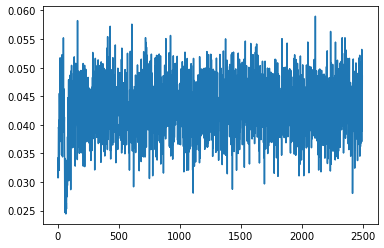

In [13]:
plt.plot(opt[0])

In [14]:
print(f'Best Match: {opt[1]}')
print(f'Final Match: {opt[2]}')

Best Match: {'loss': 0.024425362293818965, 'parameters': array([1.00000000e-08, 4.36790046e-01, 2.31021532e-01])}
Final Match: {'loss': 0.04852267883642153, 'parameters': array([1.e-08, 1.e-08, 0.e+00])}


[3.60000000e-06 4.93111041e-01 8.31677514e+01]
[3.60000000e-06 1.00000009e-01 0.00000000e+00]


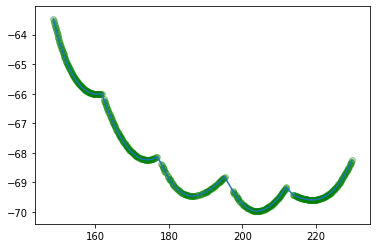

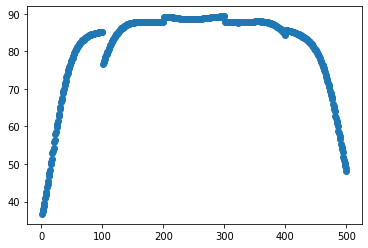

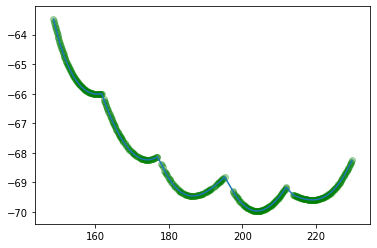

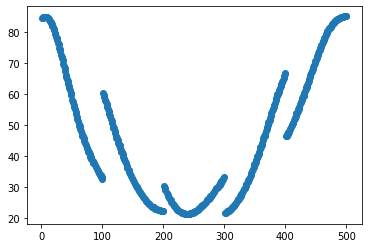

In [15]:
params = opt[1]['parameters']
check_fit(params, min_vals, max_vals, all_curves, interior)

params = opt[2]['parameters']
check_fit(params, min_vals, max_vals, all_curves, interior)

In [12]:
np.array([2.69003376e+02, 2.57206017e-01, 2.07103796e+02]) # @ 150 iterations round 1
np.array([15.93084616,  0.53219007, 37.23026401]) # @ 150 iterations round 2

array([15.93084616,  0.53219007, 37.23026401])

## Try Fitting Alex

In [8]:
import fitting

constraints = [
    dict(wrapValues=True, minValue=1e-8, maxValue=1),
    dict(minValue=1e-8, maxValue=1),
    dict(minValue=0, maxValue=1)
]

numParams = 3
start_params = [np.random.rand() for iter in range(numParams)]
# start_params = [188.04192212, 0.21281051, 155.38088508]

optimizer = fitting.Adam()
# optimizer = fitting.Nesterov()


opt = optimizer.minimize(
    fitting.test_stress_parameters, 
    alex_curves, 
    start_params, 
    interior,
    constraints=constraints,
    max_iterations=500,
    verbose=True
)

Iteration 1/500 -- Loss Output: 0.03814558346475776 -- Moving Avg Loss: 0.03814558346475776
Iteration 2/500 -- Loss Output: 0.0380966819233171 -- Moving Avg Loss: 0.03812113269403743
Iteration 3/500 -- Loss Output: 0.037280159878460575 -- Moving Avg Loss: 0.037840808422178476
Iteration 4/500 -- Loss Output: 0.036963450083938414 -- Moving Avg Loss: 0.03762146883761846
Iteration 5/500 -- Loss Output: 0.03581280823963039 -- Moving Avg Loss: 0.037259736718020846
Iteration 6/500 -- Loss Output: 0.03282863431038712 -- Moving Avg Loss: 0.03652121965008189
Iteration 7/500 -- Loss Output: 0.04131201831945473 -- Moving Avg Loss: 0.037205619459992297
Iteration 8/500 -- Loss Output: 0.028167524396849754 -- Moving Avg Loss: 0.03607585757709948
Iteration 9/500 -- Loss Output: 0.031641070946313604 -- Moving Avg Loss: 0.035583103507012166
Iteration 10/500 -- Loss Output: 0.03908318434500204 -- Moving Avg Loss: 0.035933111590811154
Iteration 11/500 -- Loss Output: 0.3297395048228803 -- Moving Avg Loss:

Iteration 90/500 -- Loss Output: 0.034776929978025714 -- Moving Avg Loss: 0.22567239696191635
Iteration 91/500 -- Loss Output: 0.5820294226456216 -- Moving Avg Loss: 0.23977362304538852
Iteration 92/500 -- Loss Output: 0.9893520274537919 -- Moving Avg Loss: 0.27790240098801955
Iteration 93/500 -- Loss Output: 0.03453065347993824 -- Moving Avg Loss: 0.27547961198967624
Iteration 94/500 -- Loss Output: 0.8369074525608217 -- Moving Avg Loss: 0.29849025456799017
Iteration 95/500 -- Loss Output: 0.5431296018794657 -- Moving Avg Loss: 0.2940238176372014
Iteration 96/500 -- Loss Output: 0.034214169281529434 -- Moving Avg Loss: 0.27147711147481396
Iteration 97/500 -- Loss Output: 1.1655725234900993 -- Moving Avg Loss: 0.31691441086818467
Iteration 98/500 -- Loss Output: 0.5751629750036157 -- Moving Avg Loss: 0.3323897245471249
Iteration 99/500 -- Loss Output: 0.035548562438730974 -- Moving Avg Loss: 0.3323141894555738
Iteration 100/500 -- Loss Output: 1.2592289199652937 -- Moving Avg Loss: 0.3

Iteration 179/500 -- Loss Output: 0.7556364420950724 -- Moving Avg Loss: 0.7620035680829561
Iteration 180/500 -- Loss Output: 0.7402965768259478 -- Moving Avg Loss: 0.7306644046596636
Iteration 181/500 -- Loss Output: 0.48131456710446635 -- Moving Avg Loss: 0.7384709110752651
Iteration 182/500 -- Loss Output: 0.6842935184475823 -- Moving Avg Loss: 0.7514433567086098
Iteration 183/500 -- Loss Output: 0.8973164422376336 -- Moving Avg Loss: 0.7148196950684128
Iteration 184/500 -- Loss Output: 0.9942475109365406 -- Moving Avg Loss: 0.700777575385946
Iteration 185/500 -- Loss Output: 1.4495834939098888 -- Moving Avg Loss: 0.7569460579873721
Iteration 186/500 -- Loss Output: 0.0589028262930241 -- Moving Avg Loss: 0.7045609181163748
Iteration 187/500 -- Loss Output: 0.04409351399281195 -- Moving Avg Loss: 0.6875215219272462
Iteration 188/500 -- Loss Output: 0.5499799126703129 -- Moving Avg Loss: 0.6968691981554771
Iteration 189/500 -- Loss Output: 0.6087221177851773 -- Moving Avg Loss: 0.7193

Iteration 268/500 -- Loss Output: 0.08370386108840998 -- Moving Avg Loss: 0.23951098899687348
Iteration 269/500 -- Loss Output: 0.0905682467405854 -- Moving Avg Loss: 0.21399255754210839
Iteration 270/500 -- Loss Output: 0.04833462845244803 -- Moving Avg Loss: 0.21409885945472026
Iteration 271/500 -- Loss Output: 0.05429348258258037 -- Moving Avg Loss: 0.2095102044025359
Iteration 272/500 -- Loss Output: 0.7644208698949784 -- Moving Avg Loss: 0.238013456490679
Iteration 273/500 -- Loss Output: 0.7845970879634837 -- Moving Avg Loss: 0.2327906406713312
Iteration 274/500 -- Loss Output: 0.05178194963401899 -- Moving Avg Loss: 0.2331071821517874
Iteration 275/500 -- Loss Output: 0.12063585943980941 -- Moving Avg Loss: 0.23542725600209477
Iteration 276/500 -- Loss Output: 0.27481823619609985 -- Moving Avg Loss: 0.23410848188061856
Iteration 277/500 -- Loss Output: 0.568421651709094 -- Moving Avg Loss: 0.25470734200559103
Iteration 278/500 -- Loss Output: 0.5679549205768123 -- Moving Avg Los

Iteration 356/500 -- Loss Output: 0.05588122018297903 -- Moving Avg Loss: 0.21618444072293436
Iteration 357/500 -- Loss Output: 0.29221205613545215 -- Moving Avg Loss: 0.2072711690349194
Iteration 358/500 -- Loss Output: 0.051435587881868625 -- Moving Avg Loss: 0.20644372302410377
Iteration 359/500 -- Loss Output: 0.04796283640794506 -- Moving Avg Loss: 0.2058781074509172
Iteration 360/500 -- Loss Output: 0.04415719389446063 -- Moving Avg Loss: 0.20536494472583647
Iteration 361/500 -- Loss Output: 0.05498841348067856 -- Moving Avg Loss: 0.2056116078009944
Iteration 362/500 -- Loss Output: 0.05163196347623142 -- Moving Avg Loss: 0.1835852914475989
Iteration 363/500 -- Loss Output: 0.07944006415484998 -- Moving Avg Loss: 0.1702117358249349
Iteration 364/500 -- Loss Output: 0.6135977455889158 -- Moving Avg Loss: 0.193144498385571
Iteration 365/500 -- Loss Output: 0.053674515847753686 -- Moving Avg Loss: 0.1934918282882149
Iteration 366/500 -- Loss Output: 0.053699079744323835 -- Moving Av

Iteration 444/500 -- Loss Output: 0.044637717597470934 -- Moving Avg Loss: 0.09648637010568137
Iteration 445/500 -- Loss Output: 0.04302168118037463 -- Moving Avg Loss: 0.09614541983549865
Iteration 446/500 -- Loss Output: 0.047711199056365054 -- Moving Avg Loss: 0.09623887620140714
Iteration 447/500 -- Loss Output: 0.05000801177791634 -- Moving Avg Loss: 0.09680198451499812
Iteration 448/500 -- Loss Output: 0.05817502601404893 -- Moving Avg Loss: 0.09736099403615579
Iteration 449/500 -- Loss Output: 0.051277537660700305 -- Moving Avg Loss: 0.09784536282140534
Iteration 450/500 -- Loss Output: 0.05940501069130947 -- Moving Avg Loss: 0.09849606927652209
Iteration 451/500 -- Loss Output: 0.04967449292785336 -- Moving Avg Loss: 0.09897400250207625
Iteration 452/500 -- Loss Output: 0.046506267322785025 -- Moving Avg Loss: 0.09885442542861597
Iteration 453/500 -- Loss Output: 0.045103816791523255 -- Moving Avg Loss: 0.09454065358566666
Iteration 454/500 -- Loss Output: 0.046015272928093265 

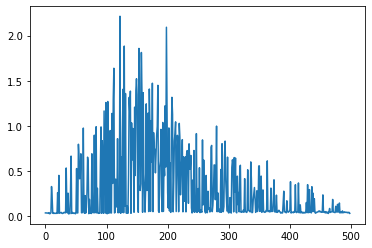

In [9]:
plt.plot(opt[0])

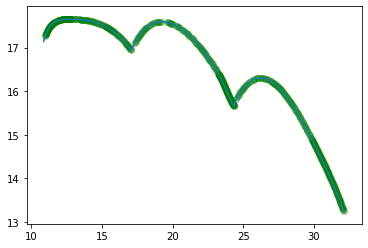

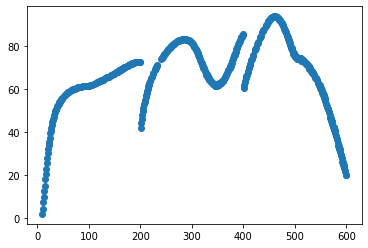

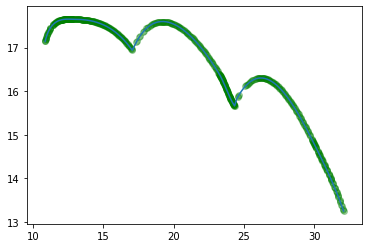

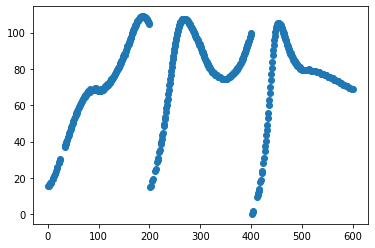

In [13]:

params = opt[1]['parameters']
check_fit(params, min_vals, max_vals, alex_curves, interior, tolerance=0.25)

params = opt[2]['parameters']
check_fit(params, min_vals, max_vals, alex_curves, interior, tolerance=0.25)

In [11]:
min_vals = np.array([0, 0.1, 0])
max_vals = np.array([360, 1, 360])

params = opt[1]['parameters']
size = len(params)

variables = params * (max_vals[0:size] - min_vals[0:size]) + min_vals[0:size]

print(variables)

params = opt[2]['parameters']
size = len(params)

variables = params * (max_vals[0:size] - min_vals[0:size]) + min_vals[0:size]
print(variables)

[108.76555361   0.23533684  88.25237391]
[91.82375632  0.19298202 71.31054267]


In [8]:
min_vals = np.array([0, 0.1, 0])
max_vals = np.array([360, 1, 360])

size = len(start_params)

variables = start_params * (max_vals[0:size] - min_vals[0:size]) + min_vals[0:size]
variables

array([ 67.74356171,   0.4546398 , 187.97578358])

In [9]:
from IPython.display import Math, HTML

def load_mathjax_in_cell_output():
  display(HTML("<script src='https://www.gstatic.com/external_hosted/"
               "mathjax/latest/MathJax.js?config=default'></script>"))
get_ipython().events.register('pre_run_cell', load_mathjax_in_cell_output)

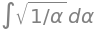

In [19]:
import sympy
sympy.init_printing()
x = sympy.symbols('alpha')
func = sympy.Integral(sympy.sqrt(1 / x), x)
func

In [10]:
# alex params without longitude
alex_good = [0.60366618, 0.70068182]

[{'wrapValues': True, 'minValue': 1e-08, 'maxValue': 1},
 {'minValue': 1e-08, 'maxValue': 1},
 {'minValue': 0, 'maxValue': 1}]